# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
from datetime import datetime

/tmp/ipykernel_2661/568079721.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Read the data

In [2]:
df1 = pd.read_csv('./data/GPP_NEE_flux_2001-2022.csv')
df2 = pd.read_csv('./data/voc_2010-2022.csv')
df3 = pd.read_csv('./data/latent_heat_flux_2018-2022.csv')
df4 = pd.read_csv('./data/latent_heat_flux_2001-2018.csv')

# Data exploration and visualization

## Raw data

In [17]:
# Convert Datetime columns to strings
df1['Datetime'] = df1['Datetime'].astype(str)
df2['Datetime'] = df2['Datetime'].astype(str)
df3['Datetime'] = df3['Datetime'].astype(str)
df4['Datetime'] = df4['Datetime'].astype(str)

### GPP NEE flux

In [4]:
df1.head()

Unnamed: 0             Datetime    NEE  NEE_gapfilling_method  GPP
0           0  2001-01-01 00:00:00  0.459                      1 -0.0
1           1  2001-01-01 00:30:00  0.459                      1 -0.0
2           2  2001-01-01 01:00:00  0.459                      1 -0.0
3           3  2001-01-01 01:30:00  0.459                      1 -0.0
4           4  2001-01-01 02:00:00  0.458                      1 -0.0

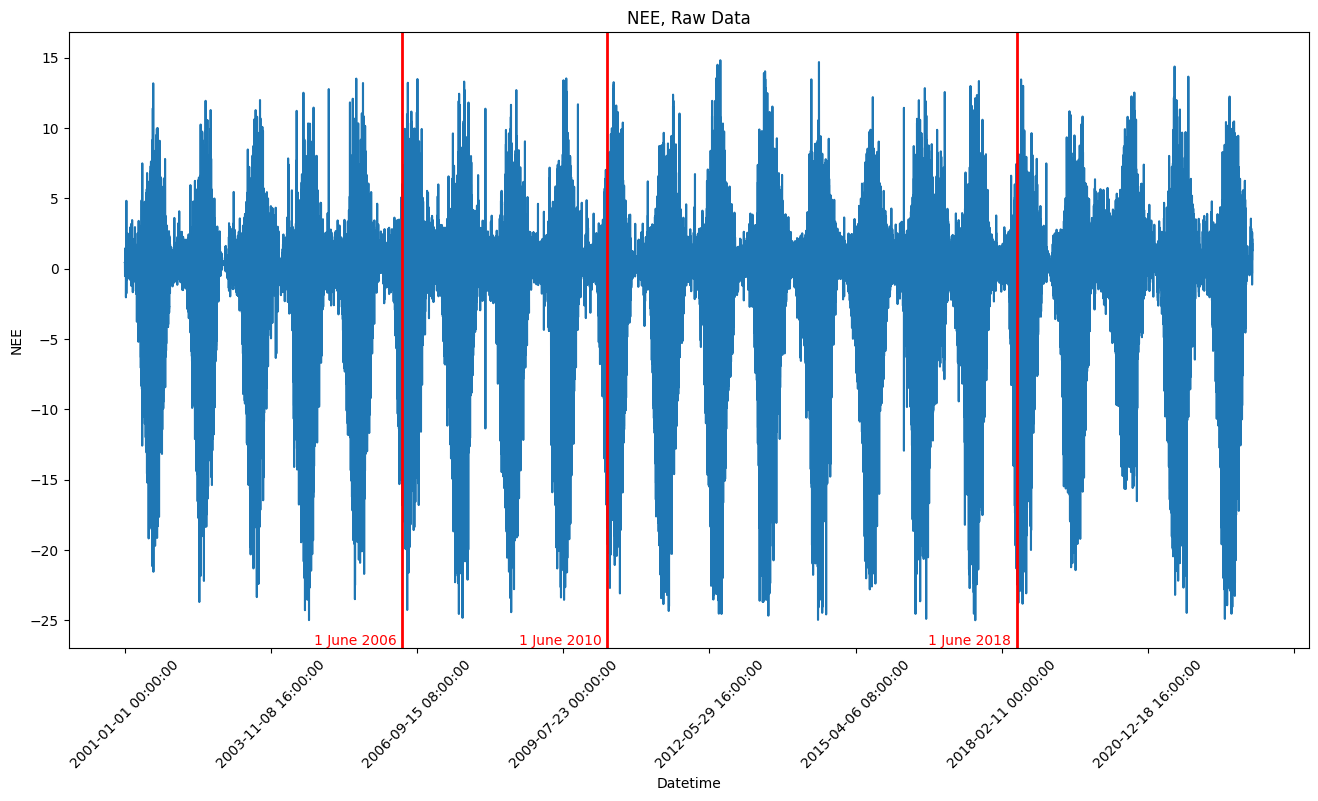

In [5]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df1.plot('Datetime','NEE', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE')
ax.set_title('NEE, Raw Data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
a = df1.loc[df1['Datetime'].str.startswith('2006-06-01'), 'Unnamed: 0'].iloc[0]
b = df1.loc[df1['Datetime'].str.startswith('2010-06-01'), 'Unnamed: 0'].iloc[0]
c = df1.loc[df1['Datetime'].str.startswith('2018-06-01'), 'Unnamed: 0'].iloc[0]
ax.axvline(a, color='r', lw=2)
ax.axvline(b, color='r', lw=2)
ax.axvline(c, color='r', lw=2)

# Add labels to the lines
ax.text(a-2000, ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(b-2000, ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(c-2000, ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

plt.show()

### VOC

In [6]:
df2.head()

Unnamed: 0             Datetime  monoterpene_flux  methanol_flux  \
0           0  2010-05-28 17:22:00          47.81872       -2.07877   
1           1  2010-05-28 20:22:00           9.34395        0.66285   
2           2  2010-05-28 23:22:00          10.63157       -1.77225   
3           3  2010-05-29 02:22:00          12.27364       -2.02885   
4           4  2010-05-29 05:22:00          19.89456       -2.66424   

   acetone_flux  acetaldehyde_flux  
0      -1.91743           -1.50219  
1      -3.22838            0.39991  
2      -3.11930           -0.03744  
3      -2.26063           -0.53726  
4           NaN            0.64042

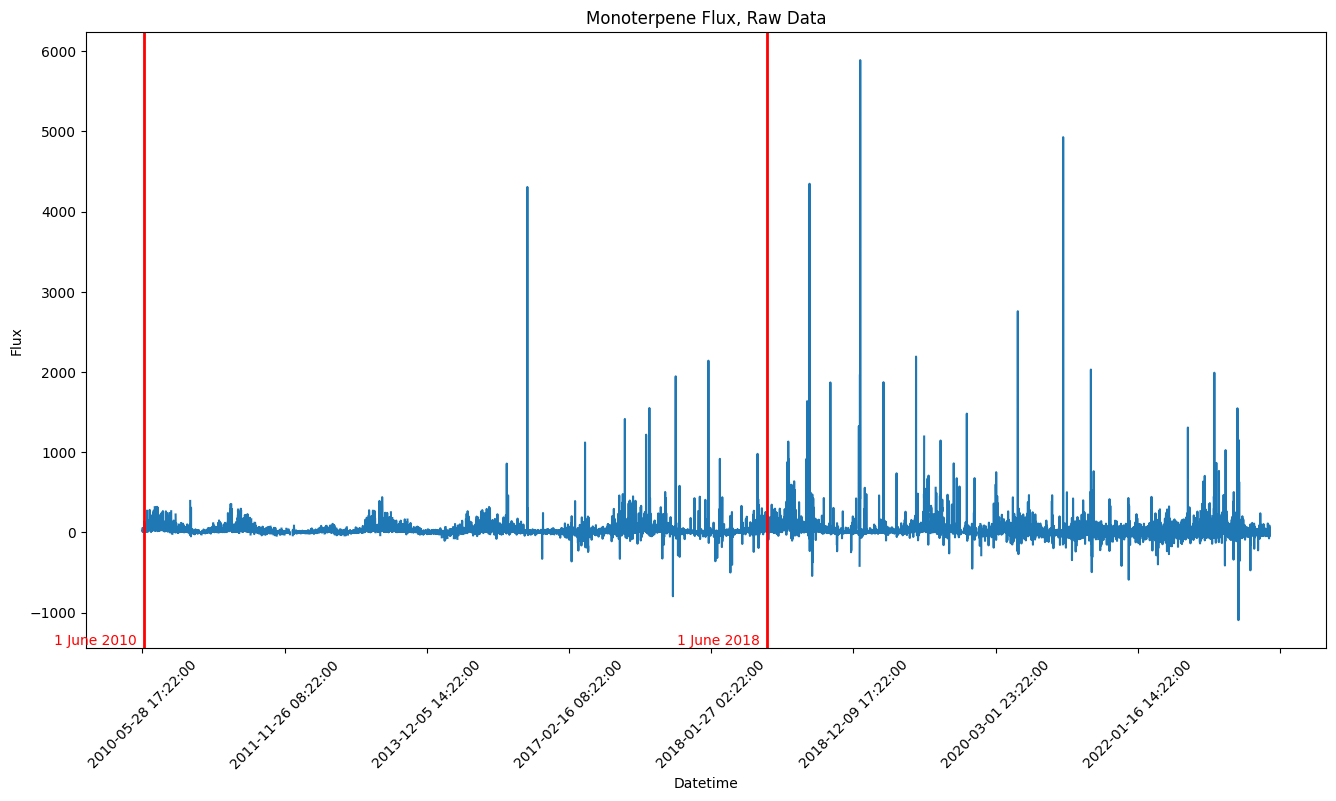

In [7]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','monoterpene_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Monoterpene Flux, Raw Data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
# a = df2.loc[df2['Datetime'].str.startswith('2006-06-01'), 'Unnamed: 0'].iloc[0]
b = df2.loc[df2['Datetime'].str.startswith('2010-06-01'), 'Unnamed: 0'].iloc[0]
c = df2.loc[df2['Datetime'].str.startswith('2018-06-01'), 'Unnamed: 0'].iloc[0]
# ax.axvline(a, color='r', lw=2)
ax.axvline(b, color='r', lw=2)
ax.axvline(c, color='r', lw=2)

# Add labels to the lines
# ax.text(a-2000, ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(b-100, ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(c-100, ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

plt.show()

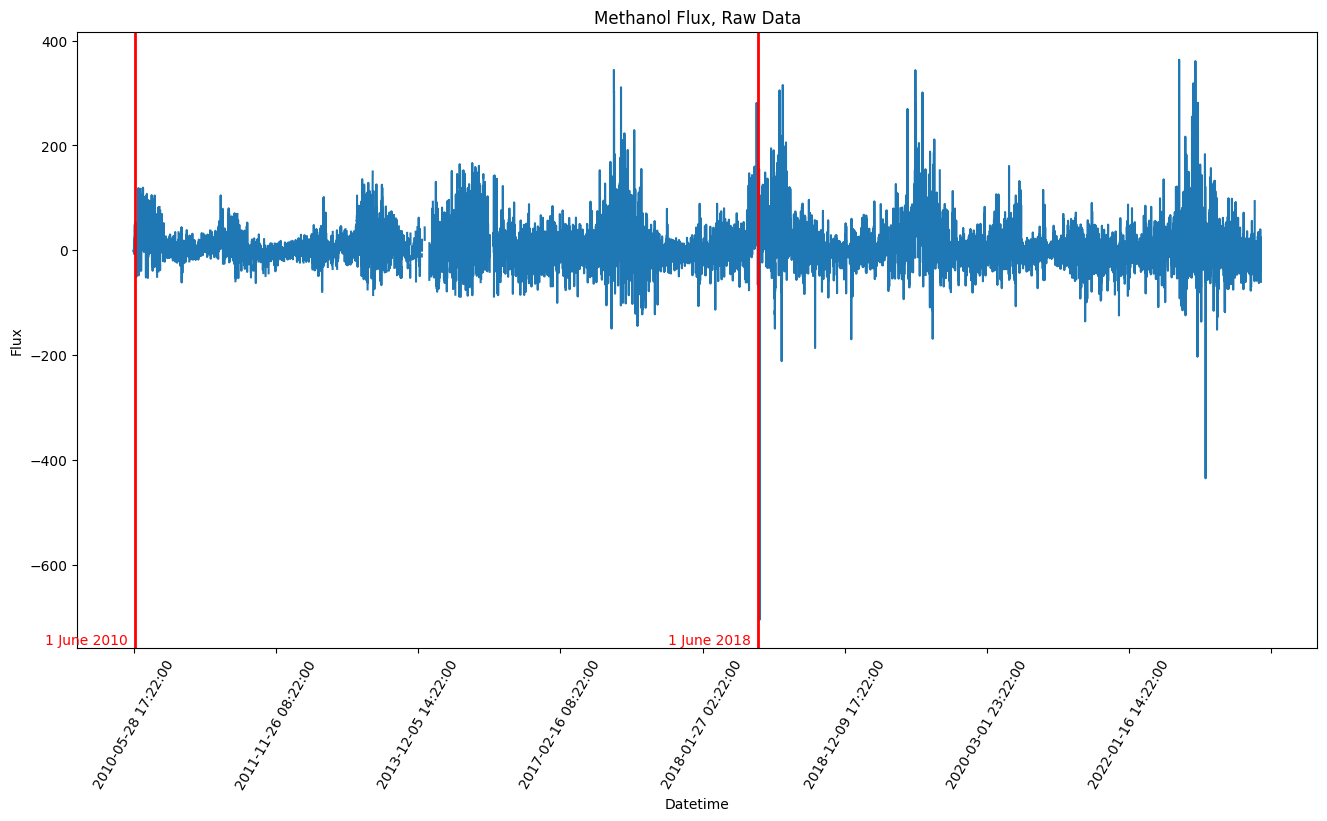

In [8]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','methanol_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Methanol Flux, Raw Data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

# Highlight the periods of interest
# a = df2.loc[df2['Datetime'].str.startswith('2006-06-01'), 'Unnamed: 0'].iloc[0]
b = df2.loc[df2['Datetime'].str.startswith('2010-06-01'), 'Unnamed: 0'].iloc[0]
c = df2.loc[df2['Datetime'].str.startswith('2018-06-01'), 'Unnamed: 0'].iloc[0]
# ax.axvline(a, color='r', lw=2)
ax.axvline(b, color='r', lw=2)
ax.axvline(c, color='r', lw=2)

# Add labels to the lines
# ax.text(a-2000, ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(b-100, ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(c-100, ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

plt.show()


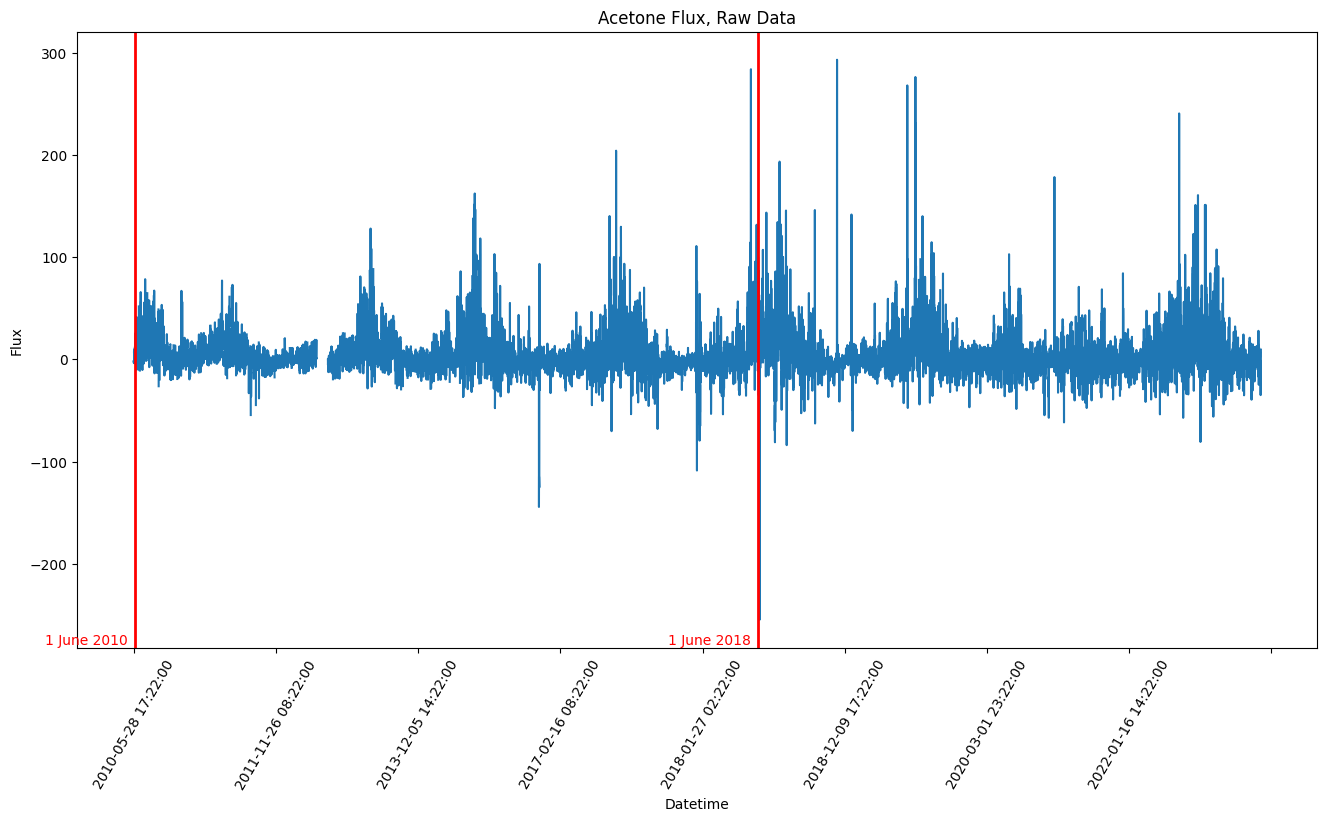

In [9]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','acetone_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Acetone Flux, Raw Data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

# Highlight the periods of interest
# a = df2.loc[df2['Datetime'].str.startswith('2006-06-01'), 'Unnamed: 0'].iloc[0]
b = df2.loc[df2['Datetime'].str.startswith('2010-06-01'), 'Unnamed: 0'].iloc[0]
c = df2.loc[df2['Datetime'].str.startswith('2018-06-01'), 'Unnamed: 0'].iloc[0]
# ax.axvline(a, color='r', lw=2)
ax.axvline(b, color='r', lw=2)
ax.axvline(c, color='r', lw=2)

# Add labels to the lines
# ax.text(a-2000, ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(b-100, ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(c-100, ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

plt.show()

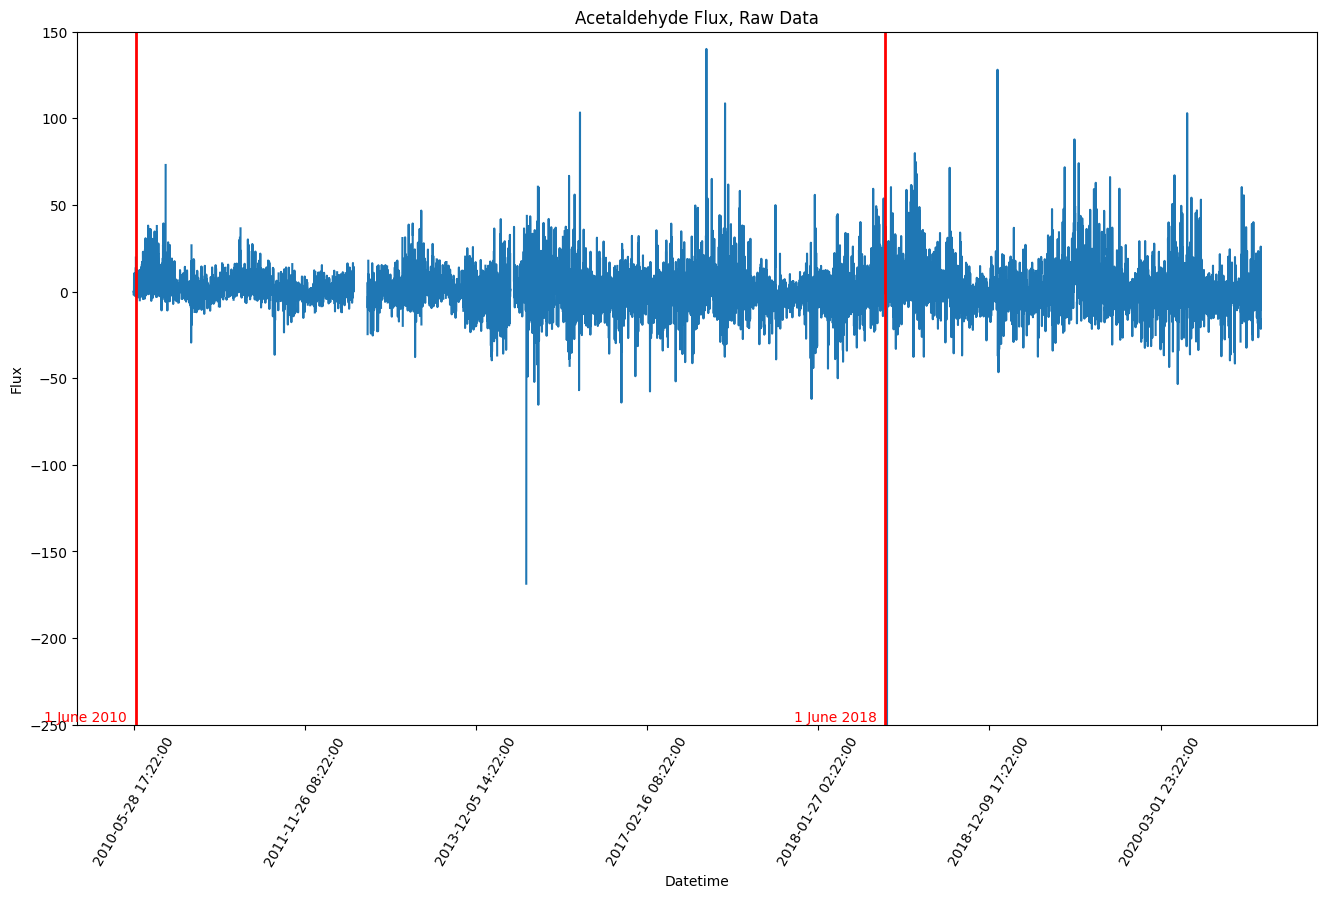

In [21]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,9))
df2.plot('Datetime','acetaldehyde_flux', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Acetaldehyde Flux, Raw Data')

# Don't show legend
ax.get_legend().remove()

# Set y-axis limits
ax.set_ylim(-250, 150)

# Grid and rotation for better readability
plt.xticks(rotation=60)

# Highlight the periods of interest
# a = df2.loc[df2['Datetime'].str.startswith('2006-06-01'), 'Unnamed: 0'].iloc[0]
b = df2.loc[df2['Datetime'].str.startswith('2010-06-01'), 'Unnamed: 0'].iloc[0]
c = df2.loc[df2['Datetime'].str.startswith('2018-06-01'), 'Unnamed: 0'].iloc[0]
# ax.axvline(a, color='r', lw=2)
ax.axvline(b, color='r', lw=2)
ax.axvline(c, color='r', lw=2)

# Add labels to the lines
# ax.text(a-2000, ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(b-100, ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(c-100, ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

plt.show()


### Latent heat flux

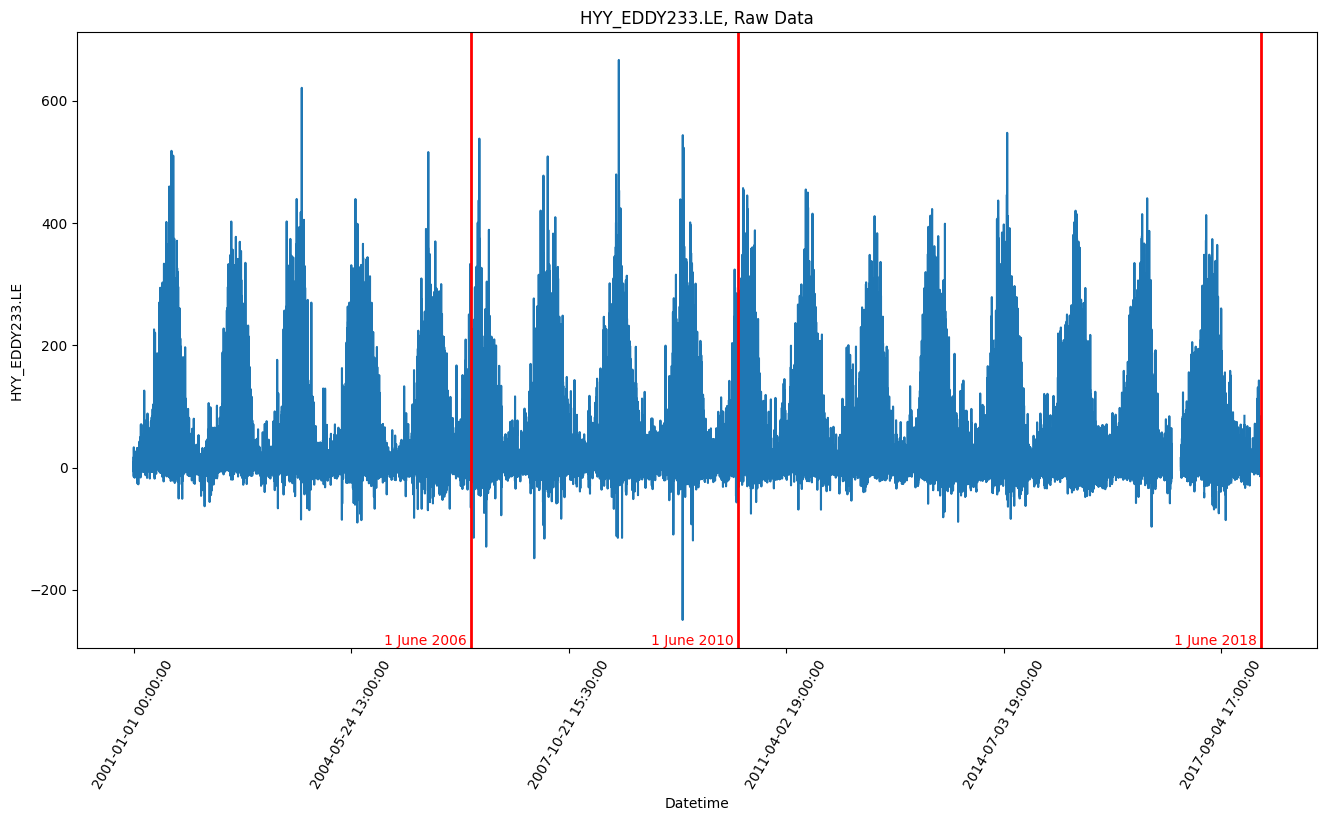

In [28]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df4.plot('Datetime','HYY_EDDY233.LE', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('HYY_EDDY233.LE')
ax.set_title('HYY_EDDY233.LE, Raw Data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

# Highlight the periods of interest
a = df4.loc[df4['Datetime'].str.startswith('2006-06-01'), 'Unnamed: 0'].iloc[0]
b = df4.loc[df4['Datetime'].str.startswith('2010-06-01'), 'Unnamed: 0'].iloc[0]
c = df4.loc[df4['Datetime'].str.startswith('2018-03-31 23:30:00'), 'Unnamed: 0'].iloc[0]
ax.axvline(a, color='r', lw=2)
ax.axvline(b, color='r', lw=2)
ax.axvline(c, color='r', lw=2)

# Add labels to the lines
ax.text(a-1000, ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(b-1000, ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(c-1000, ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

plt.show()

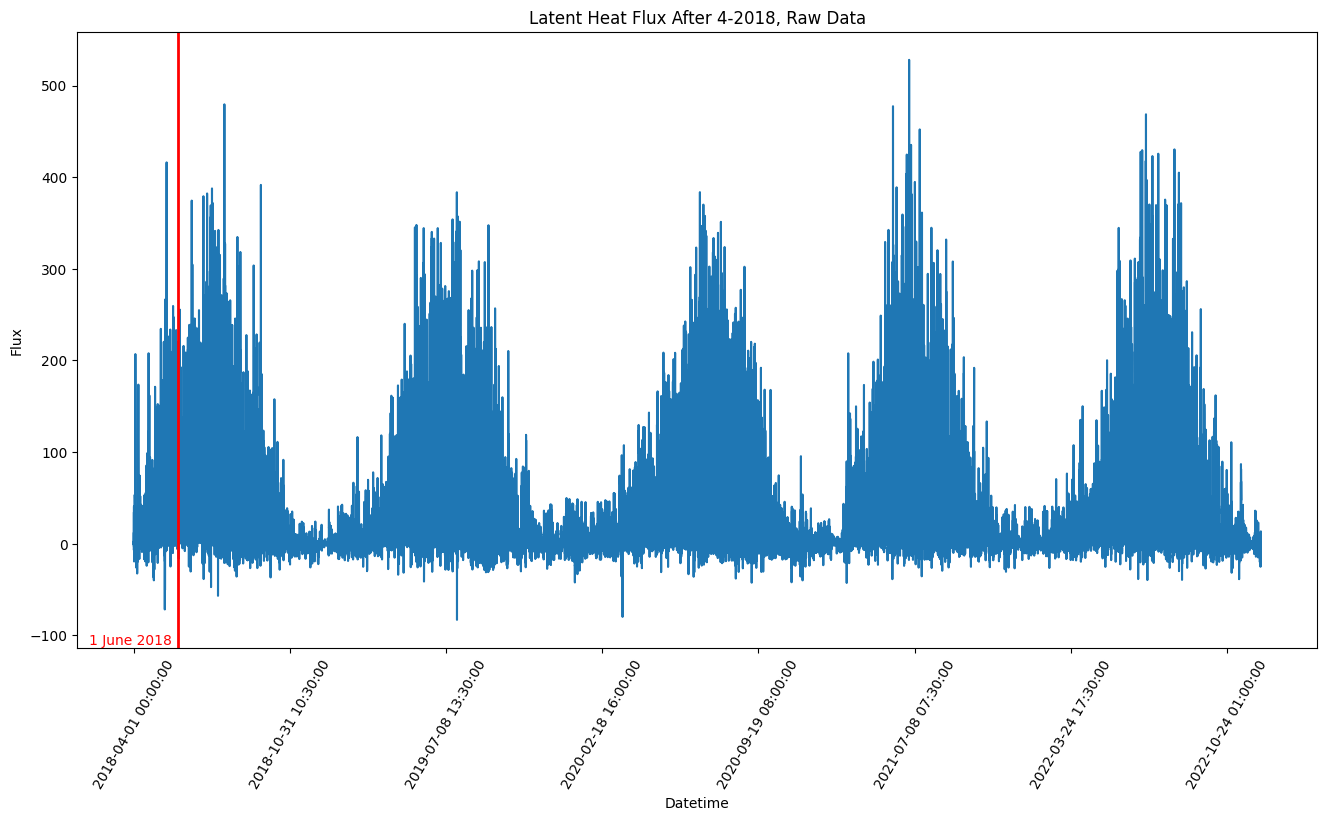

In [31]:
# Create the plot
fig, ax = plt.subplots(figsize=(16,8))
df3.plot('Datetime','latent_heat_flux_after_4-2018', ax=ax)

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Latent Heat Flux After 4-2018, Raw Data')

# Don't show legend
ax.get_legend().remove()

# Grid and rotation for better readability
plt.xticks(rotation=60)

# Highlight the periods of interest
c = df3.loc[df3['Datetime'].str.startswith('2018-06-01 00:00:00'), 'Unnamed: 0'].iloc[0]
ax.axvline(c, color='r', lw=2)

# Add labels to the lines
ax.text(c-400, ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

plt.show()

## Daily data

In [ ]:
# Convert dates to datetime objects
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df3['Datetime'] = pd.to_datetime(df3['Datetime'])
df4['Datetime'] = pd.to_datetime(df4['Datetime'])

# Aggregate to daily level
daily_df1 = df1.resample('D', on = 'Datetime').mean().reset_index()
daily_df2 = df2.resample('D', on = 'Datetime').mean().reset_index()
daily_df3 = df3.resample('D', on = 'Datetime').mean().reset_index()
daily_df4 = df4.resample('D', on = 'Datetime').mean().reset_index()

### GPP NEE flux

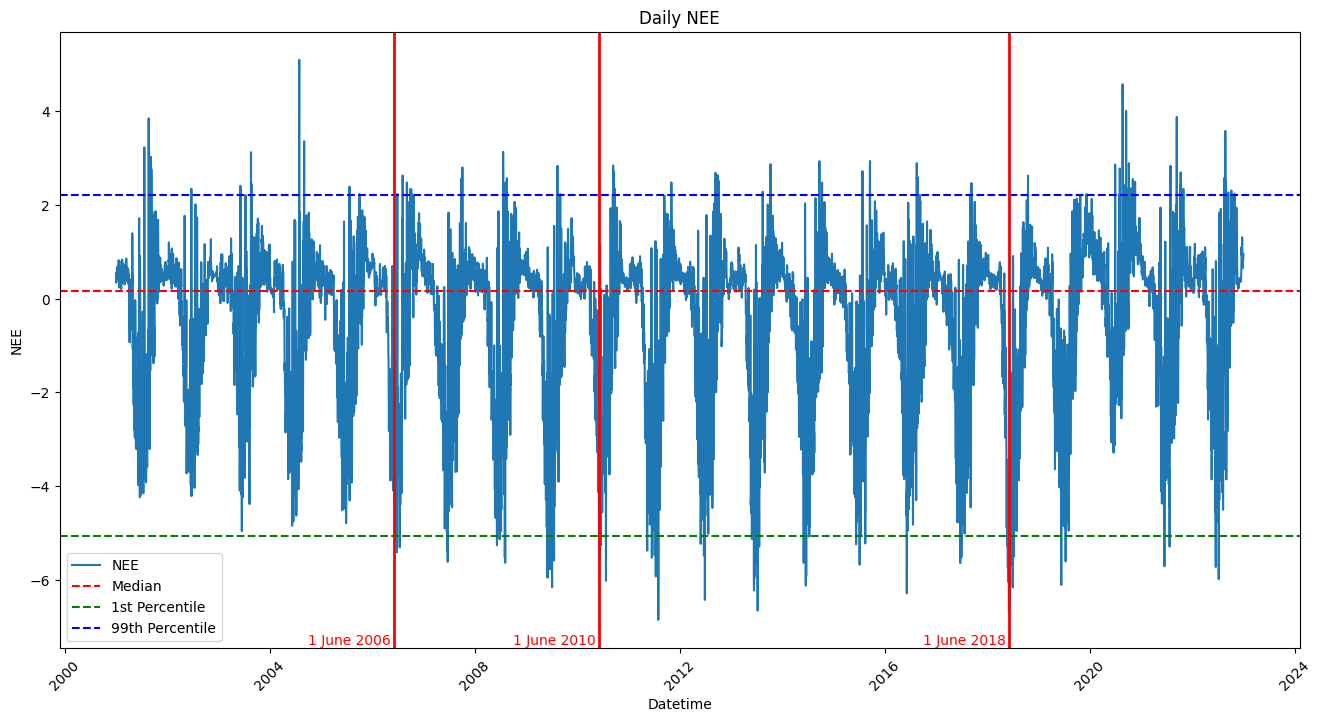

In [ ]:
# Calculate median and the percentiles
median = daily_df1['NEE'].median()
q01 = daily_df1['NEE'].quantile(0.01)
q99 = daily_df1['NEE'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(daily_df1['Datetime'], daily_df1['NEE'], label='NEE')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE')
ax.set_title('Daily NEE')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# plt.tight_layout()
plt.show()

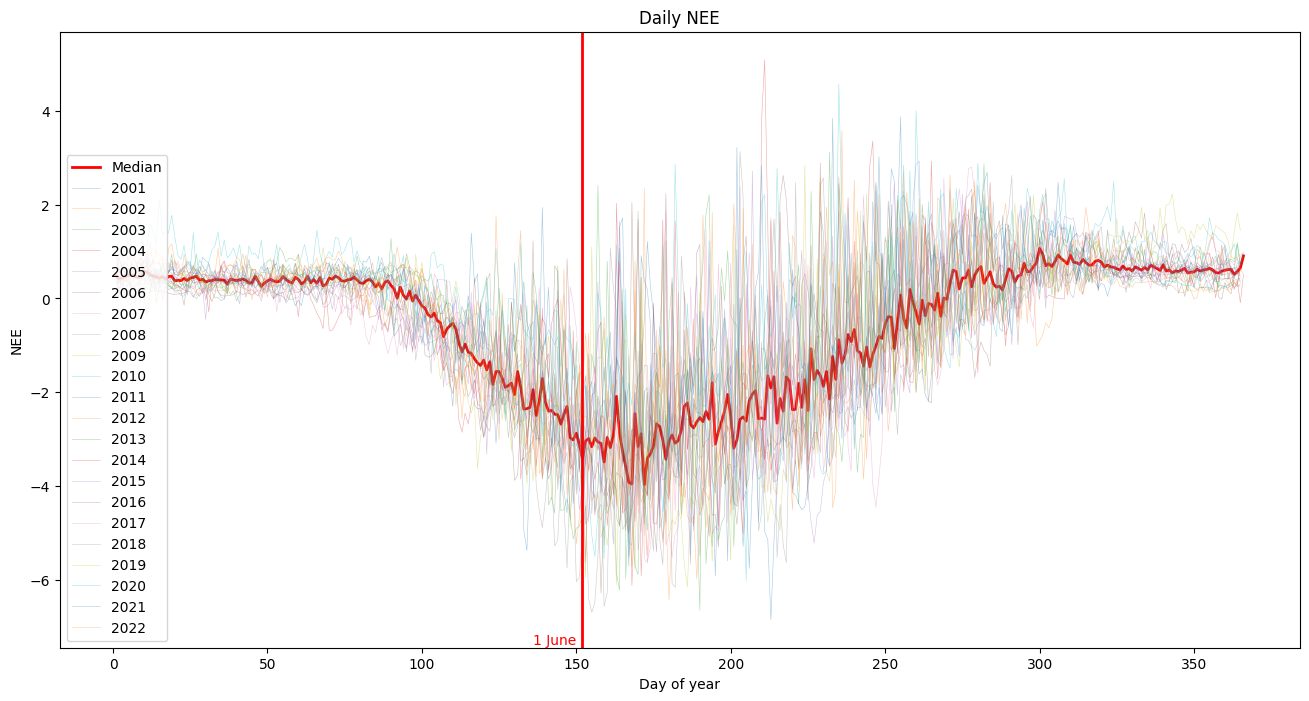

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
daily_df1_years = daily_df1.copy()

# Add a column for the day of year
daily_df1_years['day'] = daily_df1_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df1_years['year'] = daily_df1_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df1_years = daily_df1_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df1_years = daily_df1_years.pivot(index='day', columns='year', values='NEE')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df1_years.index, daily_df1_years.quantile(0.025, axis=1), daily_df1_years.quantile(0.975, axis=1), alpha=0.4)

# Plot the median
daily_df1_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
daily_df1_years.plot(ax=ax, alpha=0.4, linewidth=0.4)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('NEE')
ax.set_title('Daily NEE')
ax.legend(['Median'] + daily_df1_years.columns.tolist(), loc='lower left')

# Highlight the period of interest
ax.axvline(152, color='r', lw=2)

# Add labels to the lines
ax.text(150, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# plt.tight_layout()
plt.show()

### VOC

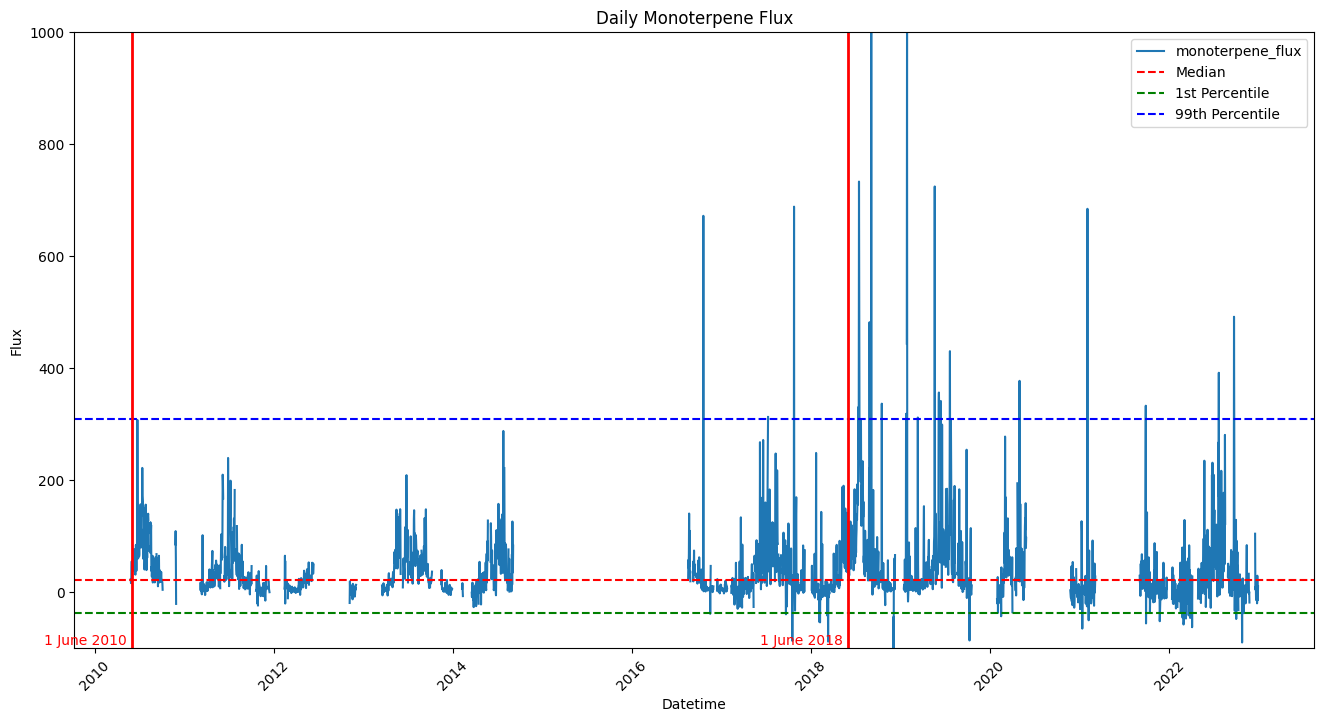

In [ ]:
# Calculate median and the percentiles
median = daily_df2['monoterpene_flux'].median()
q01 = daily_df2['monoterpene_flux'].quantile(0.01)
q99 = daily_df2['monoterpene_flux'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(daily_df2['Datetime'], daily_df2['monoterpene_flux'], label='monoterpene_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Daily Monoterpene Flux')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Set y-axis limits
ax.set_ylim(-100, 1000)

# Highlight the periods of interest
# ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
# ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# plt.tight_layout()
plt.show()


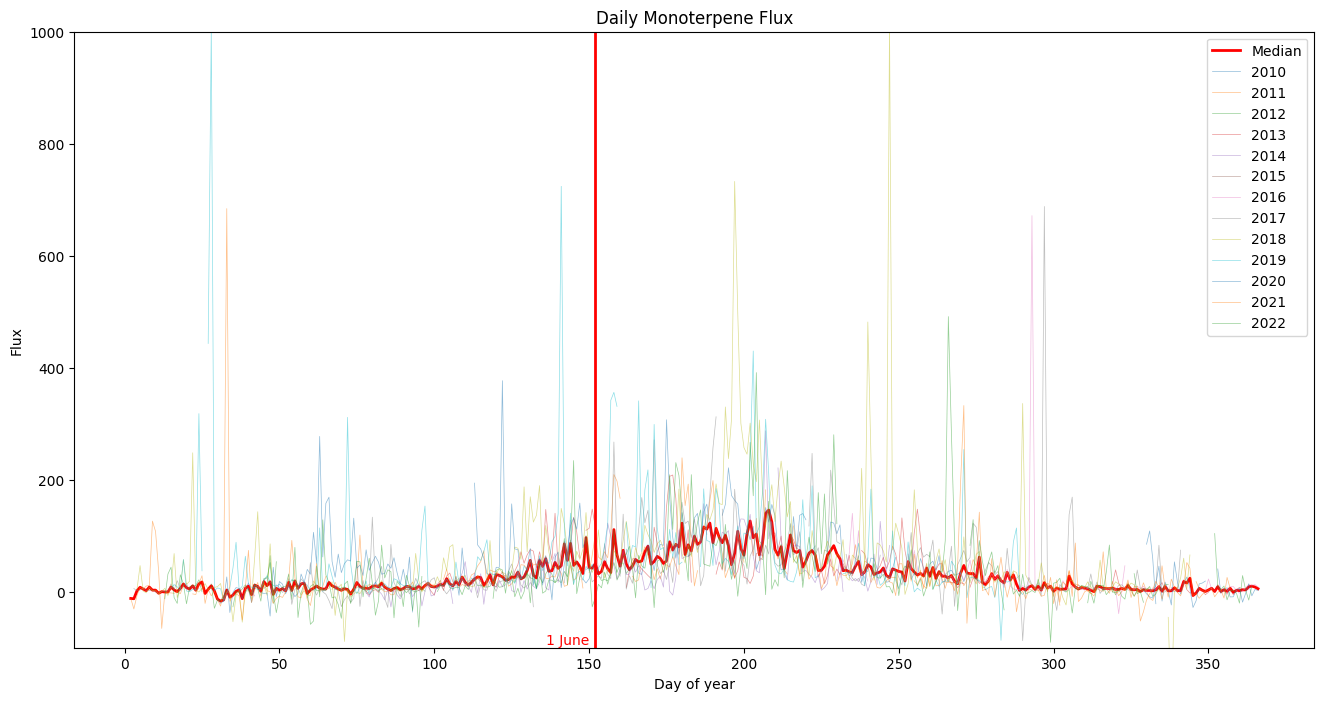

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
daily_df2_years = daily_df2.copy()

# Add a column for the day of year
daily_df2_years['day'] = daily_df2_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df2_years['year'] = daily_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df2_years = daily_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df2_years = daily_df2_years.pivot(index='day', columns='year', values='monoterpene_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df2_years.index, daily_df2_years.quantile(0.1, axis=1), daily_df2_years.quantile(0.9, axis=1), alpha=0.4)

# Plot the median
daily_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
daily_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('Flux')
ax.set_title('Daily Monoterpene Flux')
ax.legend(['Median'] + daily_df2_years.columns.tolist(), loc='upper right')

# Set y-axis limits
ax.set_ylim(-100, 1000)

# Highlight the period of interest
ax.axvline(152, color='r', lw=2)

# Add labels to the lines
ax.text(150, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# plt.tight_layout()
plt.show()

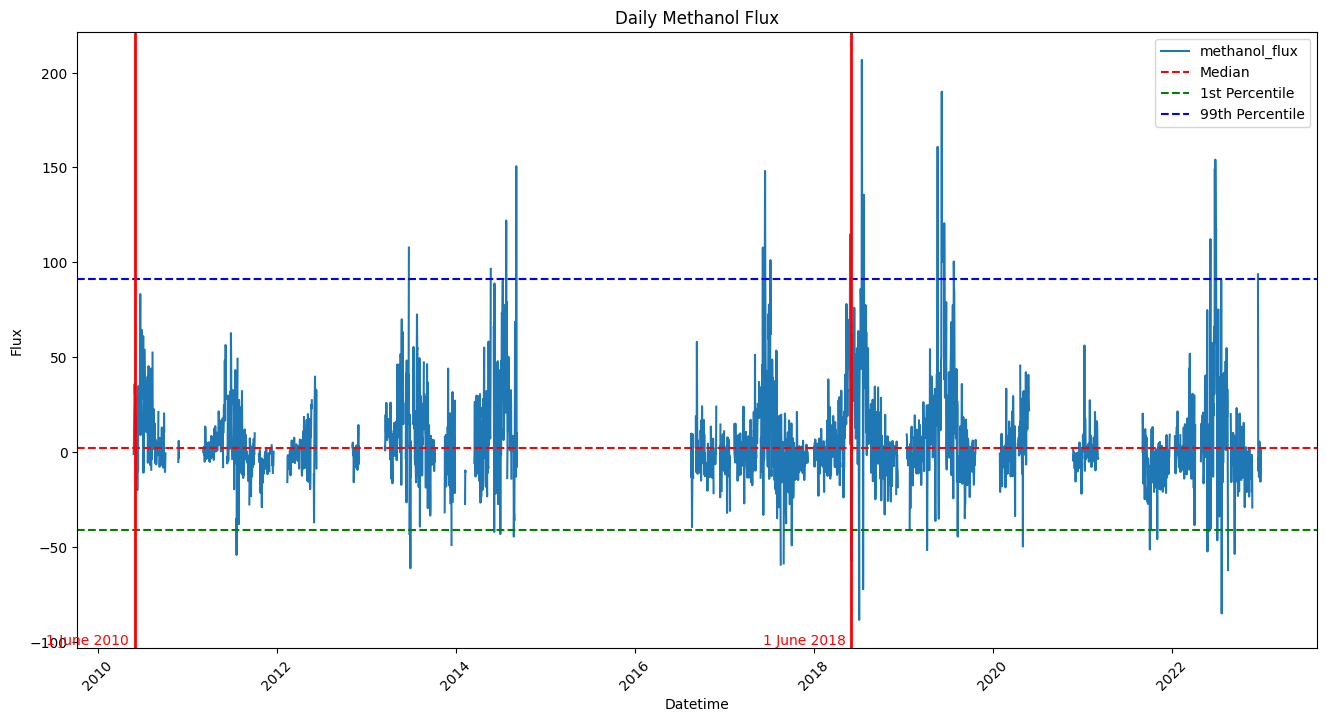

In [ ]:
# Calculate median and the percentiles
median = daily_df2['methanol_flux'].median()
q01 = daily_df2['methanol_flux'].quantile(0.01)
q99 = daily_df2['methanol_flux'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(daily_df2['Datetime'], daily_df2['methanol_flux'], label='methanol_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Daily Methanol Flux')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
# ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
# ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# plt.tight_layout()
plt.show()


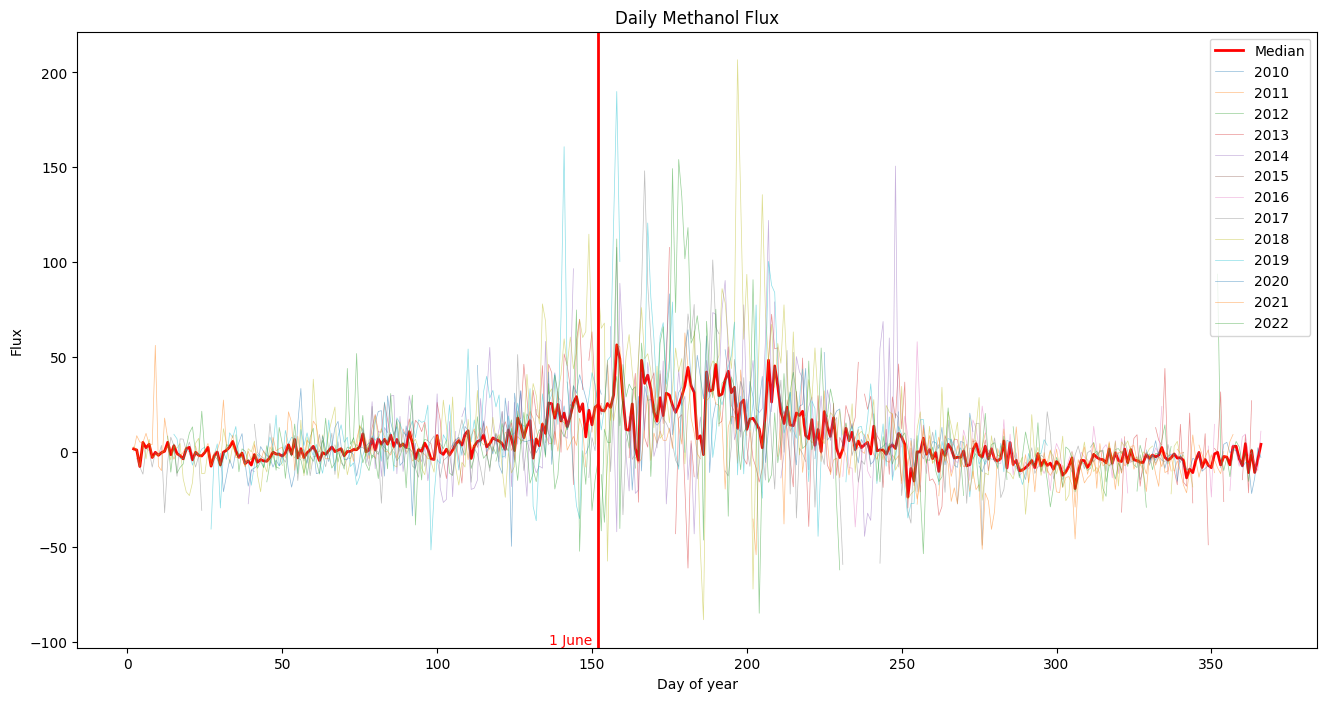

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
daily_df2_years = daily_df2.copy()

# Add a column for the day of year
daily_df2_years['day'] = daily_df2_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df2_years['year'] = daily_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df2_years = daily_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df2_years = daily_df2_years.pivot(index='day', columns='year', values='methanol_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df2_years.index, daily_df2_years.quantile(0.1, axis=1), daily_df2_years.quantile(0.9, axis=1), alpha=0.4)

# Plot the median
daily_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
daily_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('Flux')
ax.set_title('Daily Methanol Flux')
ax.legend(['Median'] + daily_df2_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(152, color='r', lw=2)

# Add labels to the lines
ax.text(150, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-75, 175)

# plt.tight_layout()
plt.show()

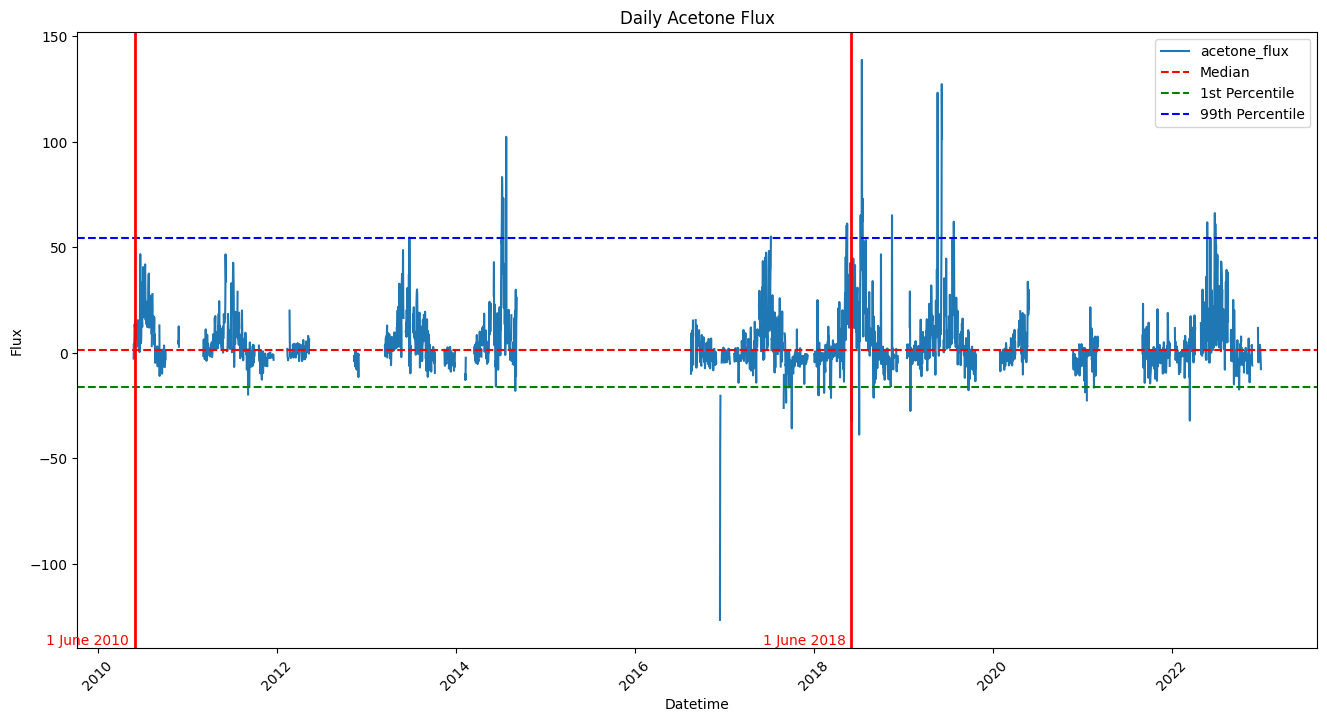

In [ ]:
# Calculate median and the percentiles
median = daily_df2['acetone_flux'].median()
q01 = daily_df2['acetone_flux'].quantile(0.01)
q99 = daily_df2['acetone_flux'].quantile(0.99)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(daily_df2['Datetime'], daily_df2['acetone_flux'], label='acetone_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Daily Acetone Flux')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
# ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
# ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-75, 125)

# plt.tight_layout()
plt.show()

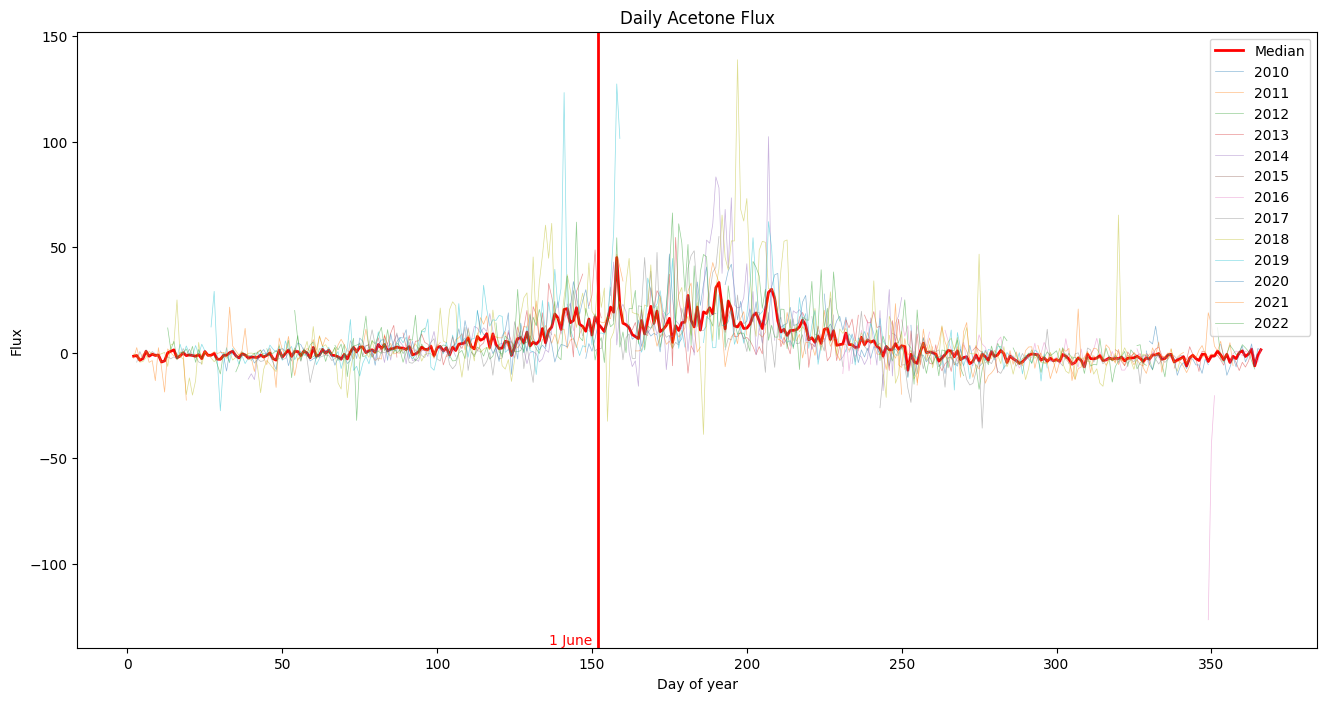

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
daily_df2_years = daily_df2.copy()

# Add a column for the day of year
daily_df2_years['day'] = daily_df2_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df2_years['year'] = daily_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df2_years = daily_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df2_years = daily_df2_years.pivot(index='day', columns='year', values='acetone_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df2_years.index, daily_df2_years.quantile(0.1, axis=1), daily_df2_years.quantile(0.9, axis=1), alpha=0.25)

# Plot the median
daily_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
daily_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('Flux')
ax.set_title('Daily Acetone Flux')
ax.legend(['Median'] + daily_df2_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(152, color='r', lw=2)

# Add labels to the lines
ax.text(150, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-75, 125)

# plt.tight_layout()
plt.show()


### Latent heat flux

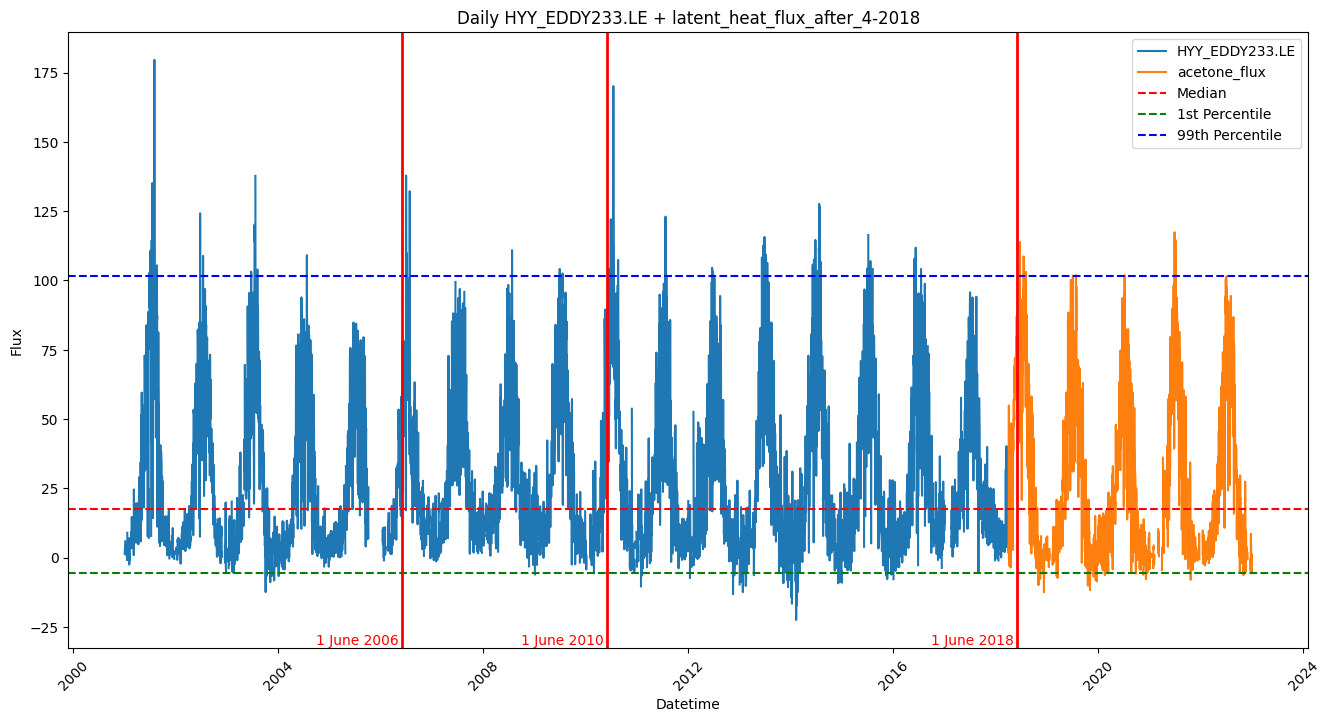

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Calculate combined median and percentiles
combined_series = pd.concat([daily_df4['HYY_EDDY233.LE'], daily_df3['latent_heat_flux_after_4-2018']], axis=0)
median = combined_series.median()
q01 = combined_series.quantile(0.01)
q99 = combined_series.quantile(0.99)

# Plot the lines
ax.plot(daily_df4['Datetime'], daily_df4['HYY_EDDY233.LE'], label='HYY_EDDY233.LE')
ax.plot(daily_df3['Datetime'], daily_df3['latent_heat_flux_after_4-2018'], label='acetone_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q01, color='g', linestyle='--', label='1st Percentile')
ax.axhline(y=q99, color='b', linestyle='--', label='99th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Daily HYY_EDDY233.LE + latent_heat_flux_after_4-2018')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-50, 125)

# plt.tight_layout()
plt.show()

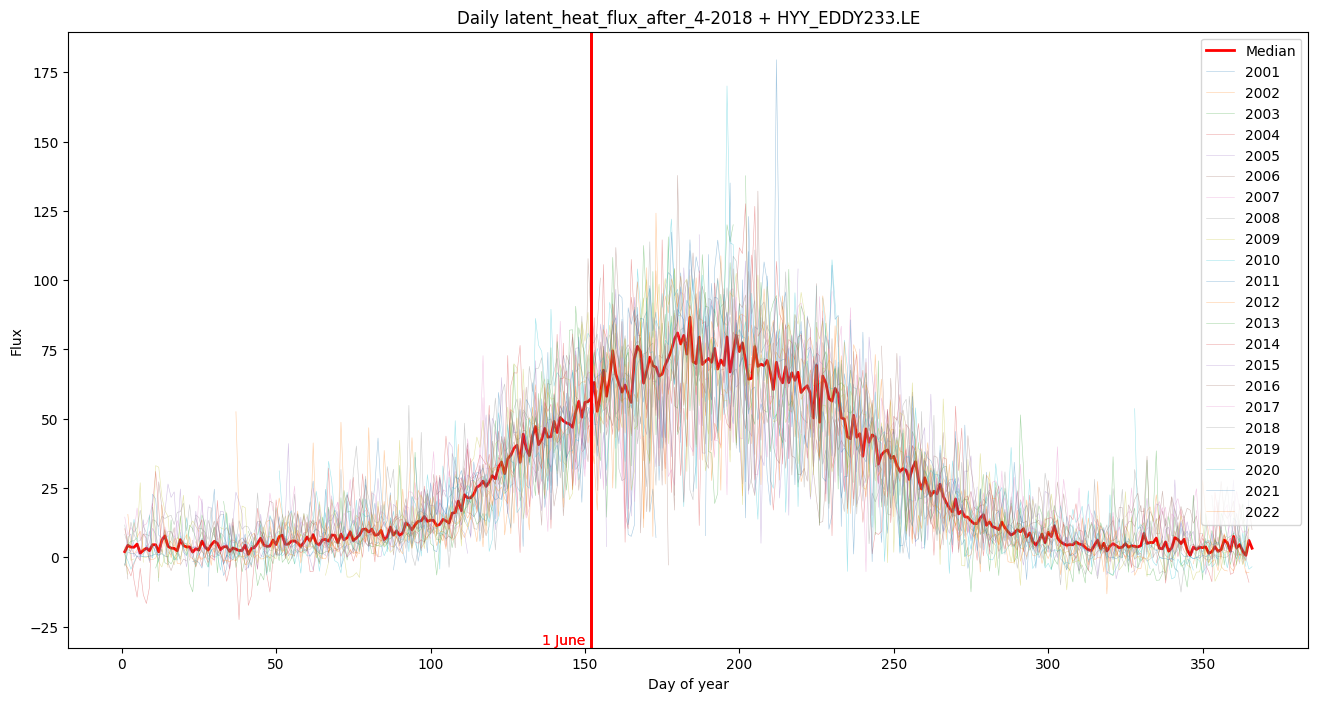

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
daily_df3_years = daily_df3.copy()
daily_df4_years = daily_df4.copy()

# Rename columns to 'flux'
daily_df3_years = daily_df3_years.rename(columns={'latent_heat_flux_after_4-2018': 'flux'})
daily_df4_years = daily_df4_years.rename(columns={'HYY_EDDY233.LE': 'flux'})

#Concatenate the dataframes
daily_df34_years = pd.concat([daily_df4_years[['Datetime', 'flux']],
                        daily_df3_years[['Datetime', 'flux']]],
                       ignore_index=True)

# Add a column for the day of year
daily_df34_years['day'] = daily_df34_years['Datetime'].dt.dayofyear

# Add a column for the year
daily_df34_years['year'] = daily_df34_years['Datetime'].dt.year

# Drop the column 'Datetime'
daily_df34_years = daily_df34_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
daily_df34_years = daily_df34_years.pivot(index='day', columns='year', values='flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
# ax.fill_between(daily_df2_years.index, daily_df2_years.quantile(0.1, axis=1), daily_df2_years.quantile(0.9, axis=1), alpha=0.25)

# Plot the median
daily_df34_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
daily_df34_years.plot(ax=ax, alpha=0.4, linewidth=0.4)

# Add labels, title, and legend
ax.set_xlabel('Day of year')
ax.set_ylabel('Flux')
ax.set_title('Daily latent_heat_flux_after_4-2018 + HYY_EDDY233.LE')
ax.legend(['Median'] + daily_df34_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(152, color='r', lw=2)

# Add labels to the lines
ax.text(150, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Highlight the period of interest
ax.axvline(152, color='r', lw=2)

# Add labels to the lines
ax.text(150, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()


## Weekly data

In [ ]:
# weekly_df1 = df1.resample('W', on = 'Datetime').mean().reset_index()
# weekly_df2 = df2.resample('W', on = 'Datetime').mean().reset_index()
# weekly_df3 = df3.resample('W', on = 'Datetime').mean().reset_index()
# weekly_df4 = df4.resample('W', on = 'Datetime').mean().reset_index()

### GPP NEE flux

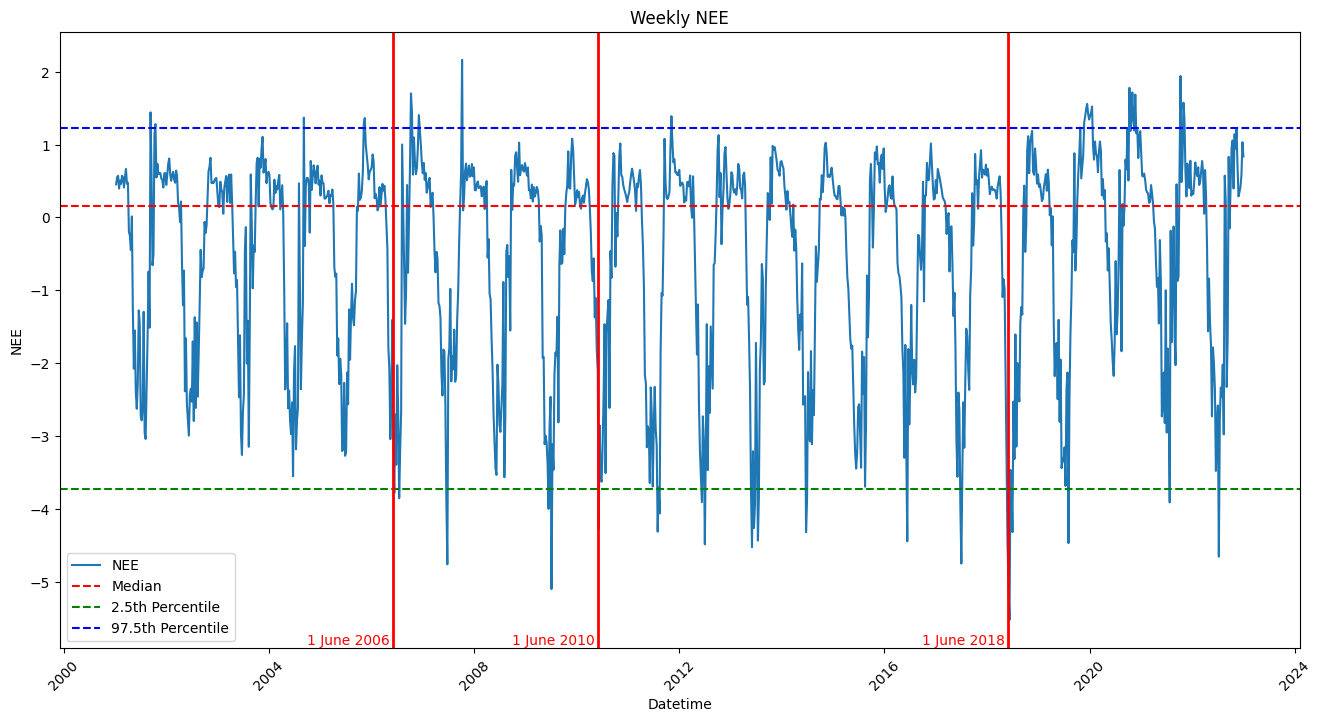

In [ ]:
# Calculate median and the percentiles
median = weekly_df1['NEE'].median()
q025 = weekly_df1['NEE'].quantile(0.025)
q975 = weekly_df1['NEE'].quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(weekly_df1['Datetime'] , weekly_df1['NEE'], label='NEE')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE')
ax.set_title('Weekly NEE')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()


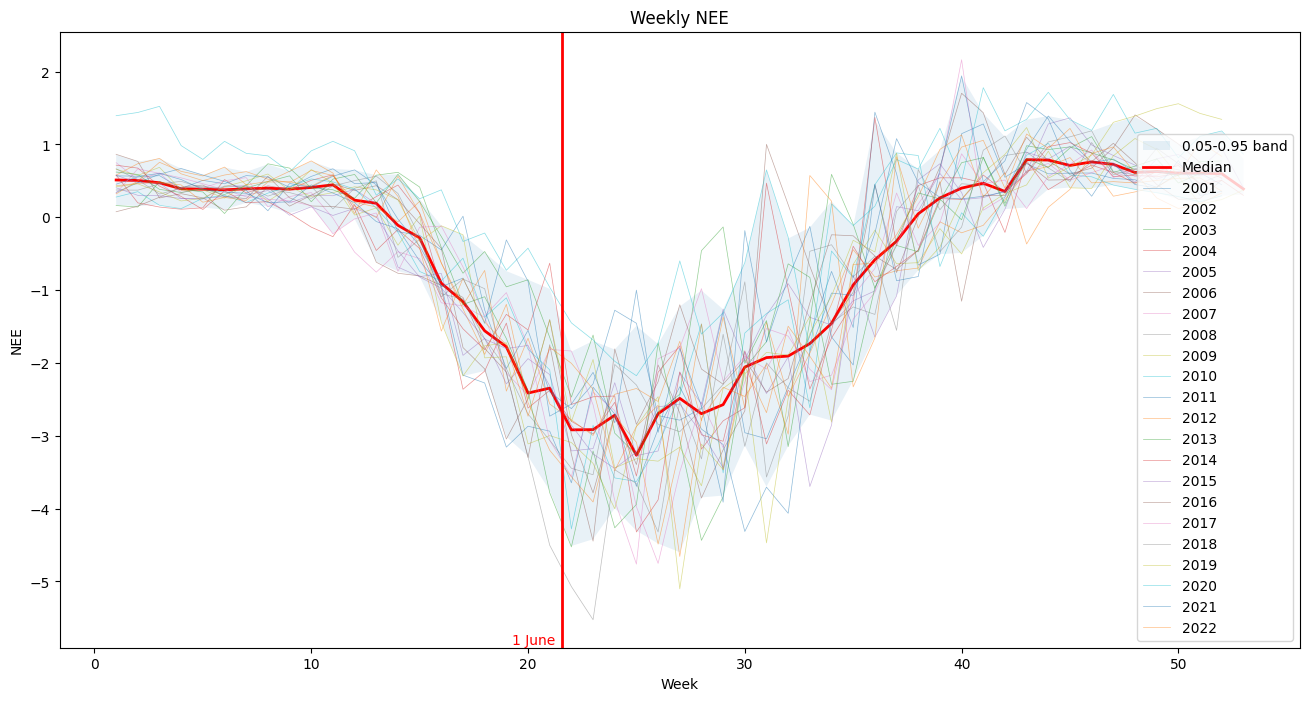

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df1_years = weekly_df1.copy()

# Add a column for the week number
weekly_df1_years['week'] = weekly_df1_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df1_years['year'] = weekly_df1_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df1_years = weekly_df1_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df1_years = weekly_df1_years.pivot(index='week', columns='year', values='NEE')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df1_years.index, weekly_df1_years.quantile(0.05, axis=1), weekly_df1_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df1_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df1_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('NEE')
ax.set_title('Weekly NEE')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df1_years.columns.tolist(), loc='lower right')

# Highlight the period of interest
ax.axvline(21.57, color='r', lw=2)

# Add labels to the lines
ax.text(21.25, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()

### VOC

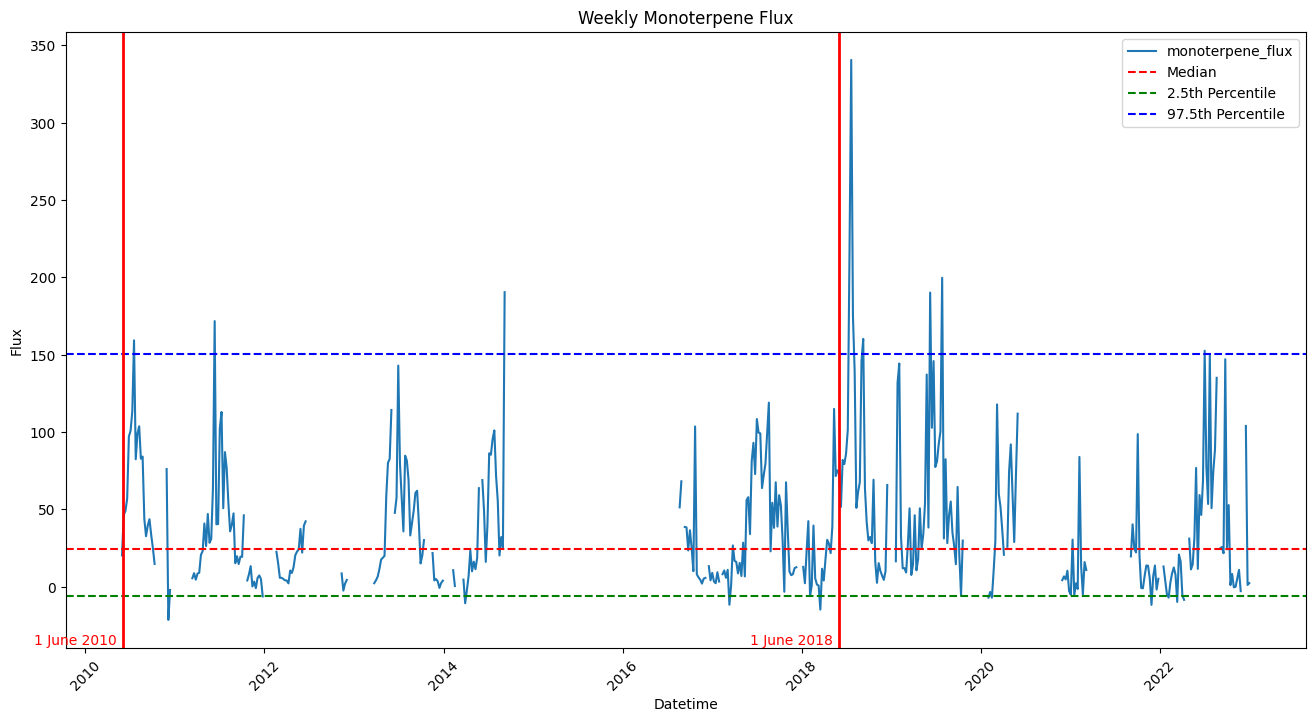

In [ ]:
# Calculate median and the percentiles
median = weekly_df2['monoterpene_flux'].median()
q025 = weekly_df2['monoterpene_flux'].quantile(0.025)
q975 = weekly_df2['monoterpene_flux'].quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(weekly_df2['Datetime'], weekly_df2['monoterpene_flux'], label='monoterpene_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Weekly Monoterpene Flux')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
# ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
# ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 250)

# plt.tight_layout()
plt.show()

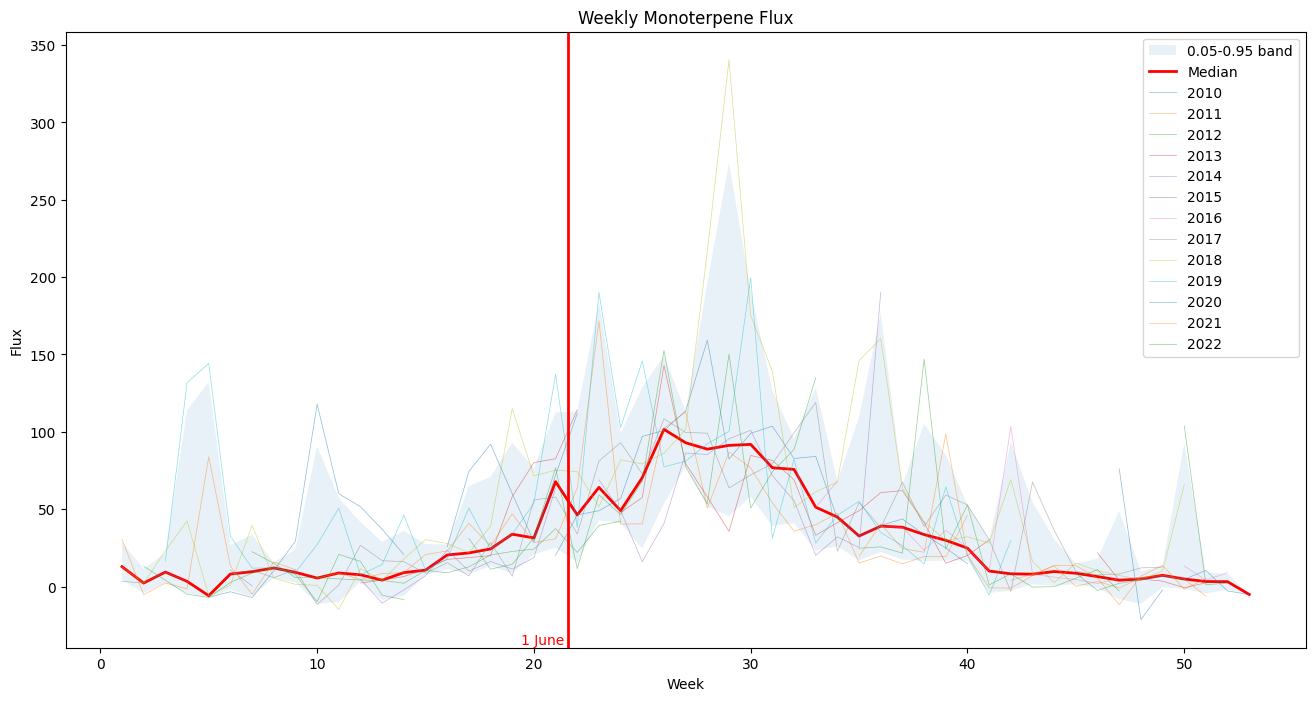

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df2_years = weekly_df2.copy()

# Add a column for the week number
weekly_df2_years['week'] = weekly_df2_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df2_years['year'] = weekly_df2_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df2_years = weekly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df2_years = weekly_df2_years.pivot(index='week', columns='year', values='monoterpene_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df2_years.index, weekly_df2_years.quantile(0.05, axis=1), weekly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('Flux')
ax.set_title('Weekly Monoterpene Flux')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df2_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(21.57, color='r', lw=2)

# Add labels to the lines
ax.text(21.4, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 250)

# plt.tight_layout()
plt.show()

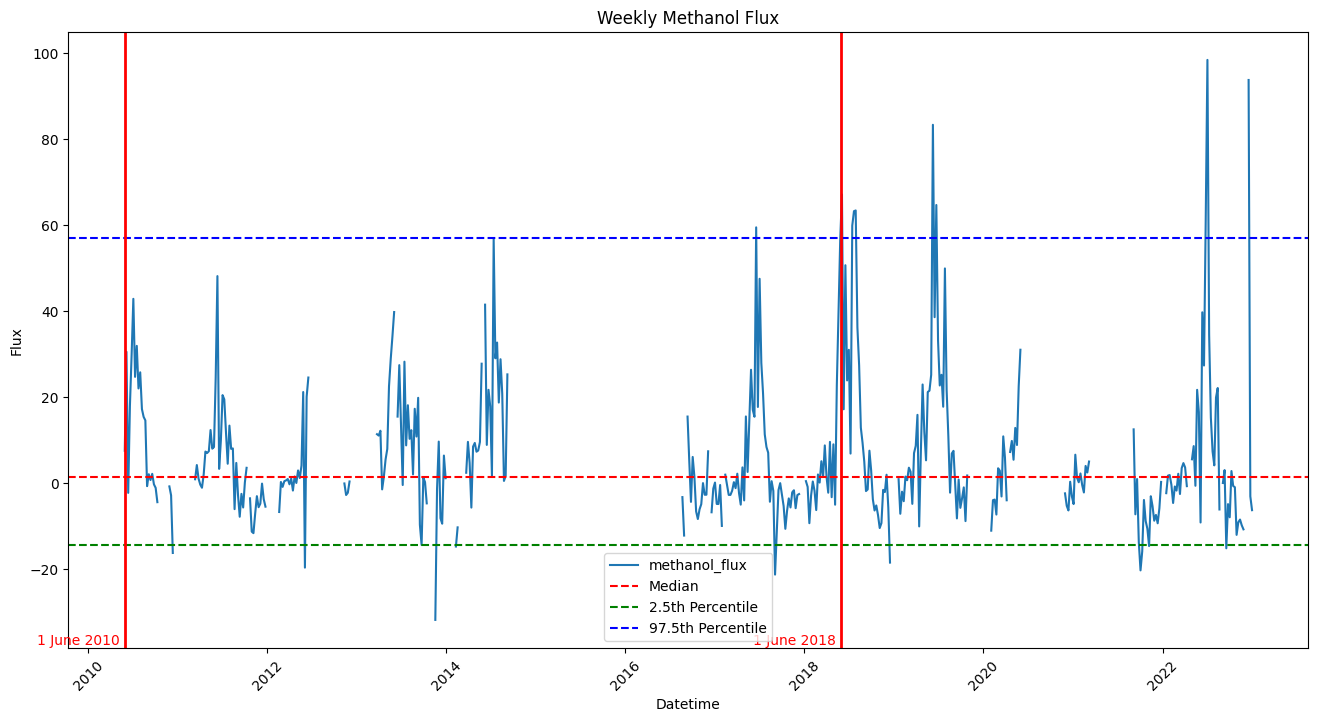

In [ ]:
# Calculate median, 10th and 90th percentiles
median = weekly_df2['methanol_flux'].median()
q025 = weekly_df2['methanol_flux'].quantile(0.025)
q975 = weekly_df2['methanol_flux'].quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(weekly_df2['Datetime'] , weekly_df2['methanol_flux'], label='methanol_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Weekly Methanol Flux')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
# ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
# ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 250)

# plt.tight_layout()
plt.show()


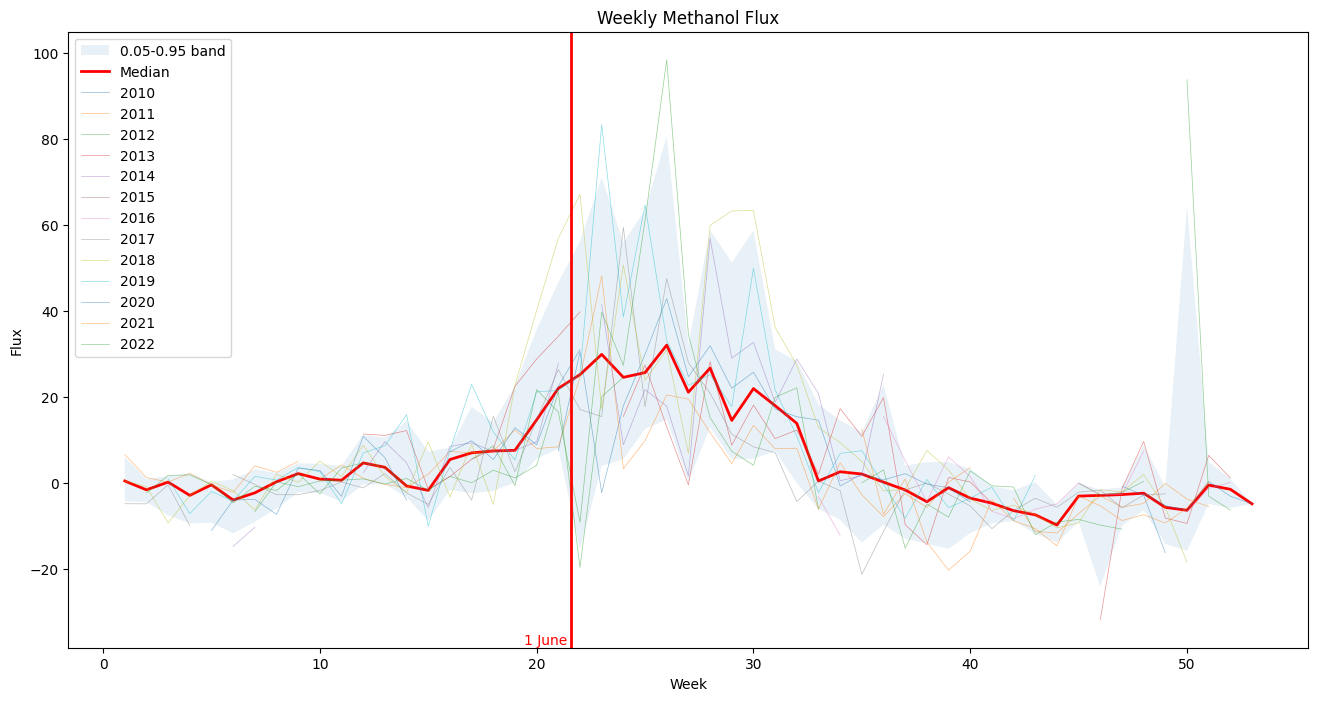

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df2_years = weekly_df2.copy()

# Add a column for the week number
weekly_df2_years['week'] = weekly_df2_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df2_years['year'] = weekly_df2_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df2_years = weekly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df2_years = weekly_df2_years.pivot(index='week', columns='year', values='methanol_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df2_years.index, weekly_df2_years.quantile(0.05, axis=1), weekly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('Flux')
ax.set_title('Weekly Methanol Flux')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df2_years.columns.tolist(), loc='upper left')

# Highlight the period of interest
ax.axvline(21.57, color='r', lw=2)

# Add labels to the lines
ax.text(21.4, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 250)

# plt.tight_layout()
plt.show()

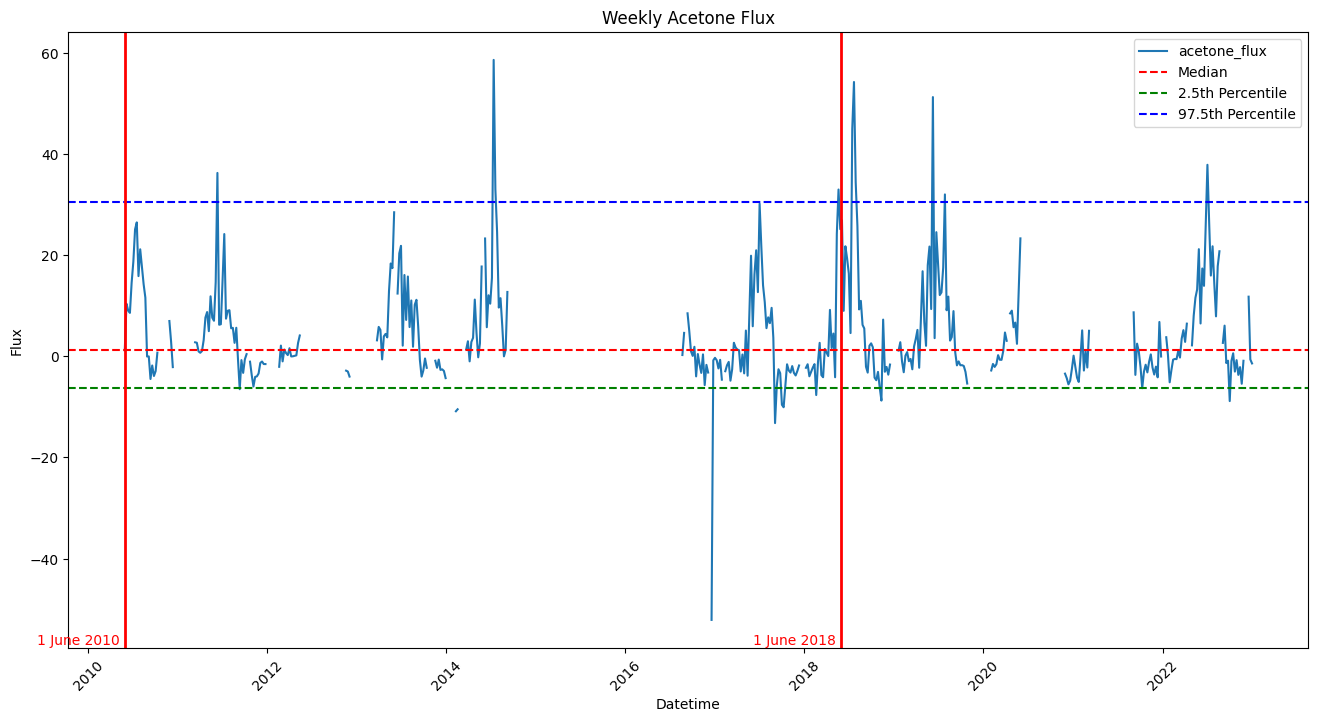

In [ ]:
# Calculate median and percentiles
median = weekly_df2['acetone_flux'].median()
q025 = weekly_df2['acetone_flux'].quantile(0.025)
q975 = weekly_df2['acetone_flux'].quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(weekly_df2['Datetime'], weekly_df2['acetone_flux'], label='acetone_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Weekly Acetone Flux')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
# ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
# ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-40, 60)

# plt.tight_layout()
plt.show()

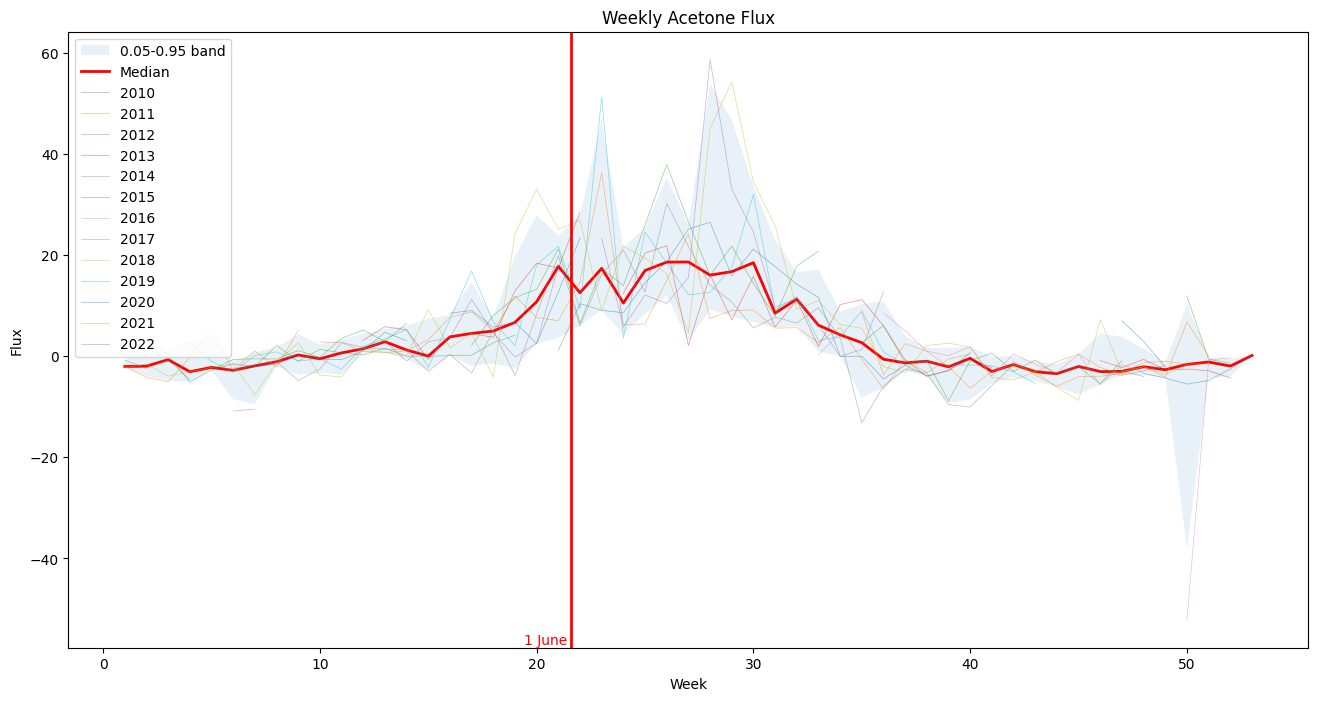

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df2_years = weekly_df2.copy()

# Add a column for the week number
weekly_df2_years['week'] = weekly_df2_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df2_years['year'] = weekly_df2_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df2_years = weekly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df2_years = weekly_df2_years.pivot(index='week', columns='year', values='acetone_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df2_years.index, weekly_df2_years.quantile(0.05, axis=1), weekly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('Flux')
ax.set_title('Weekly Acetone Flux')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df2_years.columns.tolist(), loc='upper left')

# Highlight the period of interest
ax.axvline(21.57, color='r', lw=2)

# Add labels to the lines
ax.text(21.4, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-40, 60)

# plt.tight_layout()
plt.show()

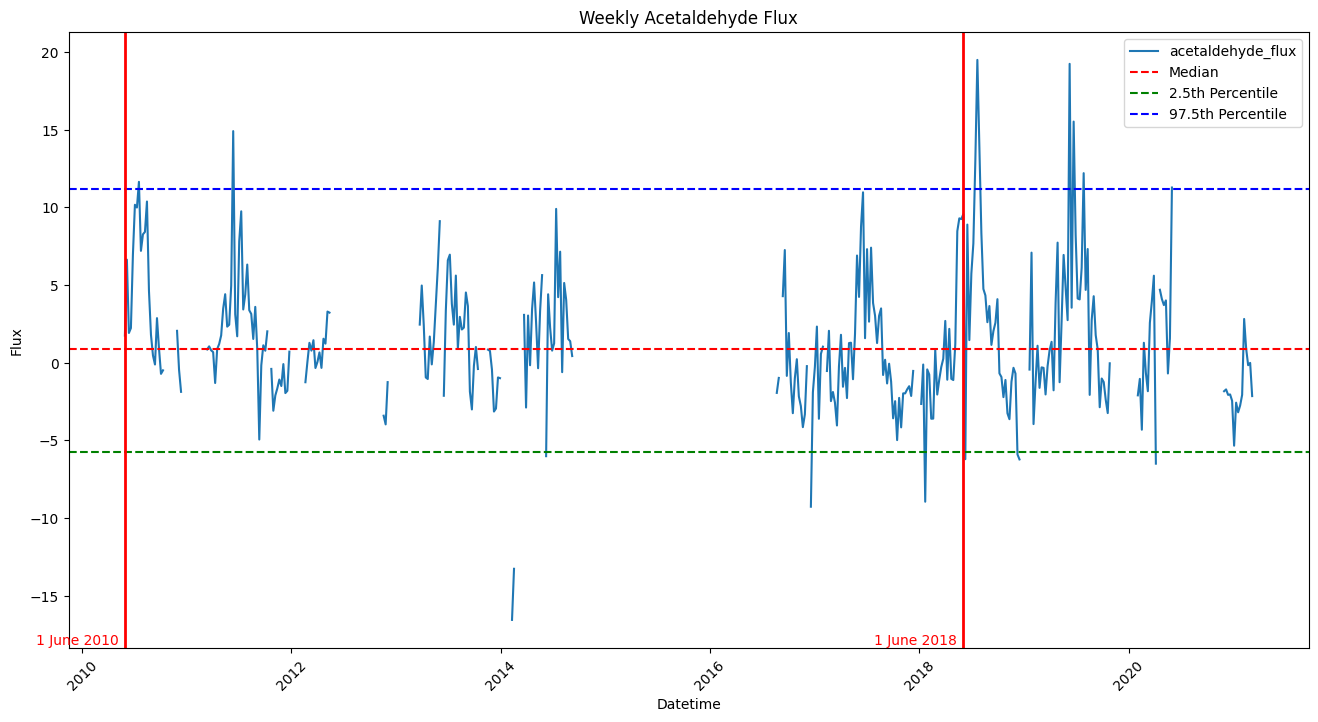

In [ ]:
# Calculate median and the percentiles
median = weekly_df2['acetaldehyde_flux'].median()
q025 = weekly_df2['acetaldehyde_flux'].quantile(0.025)
q975 = weekly_df2['acetaldehyde_flux'].quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(weekly_df2['Datetime'], weekly_df2['acetaldehyde_flux'], label='acetaldehyde_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Weekly Acetaldehyde Flux')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
# ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
# ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-40, 60)

# plt.tight_layout()
plt.show()

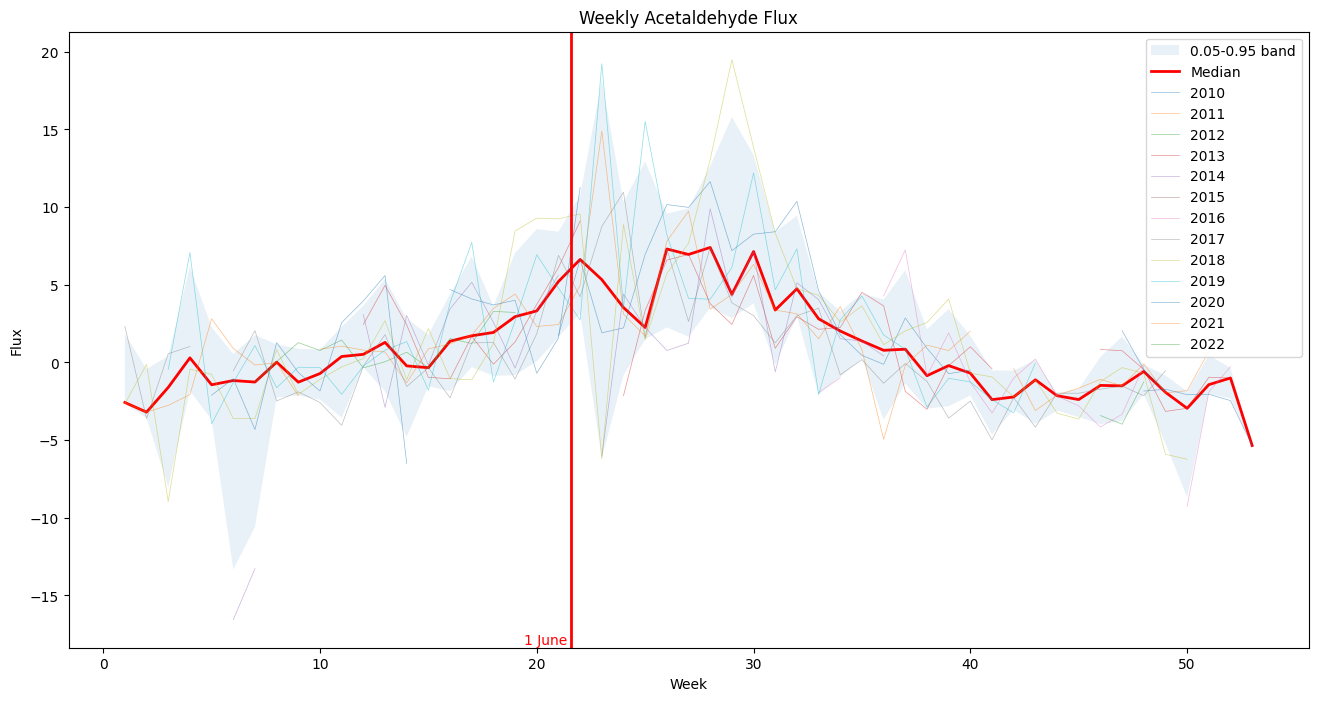

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df2_years = weekly_df2.copy()

# Add a column for the week number
weekly_df2_years['week'] = weekly_df2_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df2_years['year'] = weekly_df2_years['Datetime'].dt.isocalendar().year

# Drop the column 'Datetime'
weekly_df2_years = weekly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df2_years = weekly_df2_years.pivot(index='week', columns='year', values='acetaldehyde_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the 5th-95th percentile band
ax.fill_between(weekly_df2_years.index, weekly_df2_years.quantile(0.05, axis=1), weekly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
weekly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Week')
ax.set_ylabel('Flux')
ax.set_title('Weekly Acetaldehyde Flux')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df2_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(21.57, color='r', lw=2)

# Add labels to the lines
ax.text(21.4, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-40, 60)

# plt.tight_layout()
plt.show()

### Latent heat flux

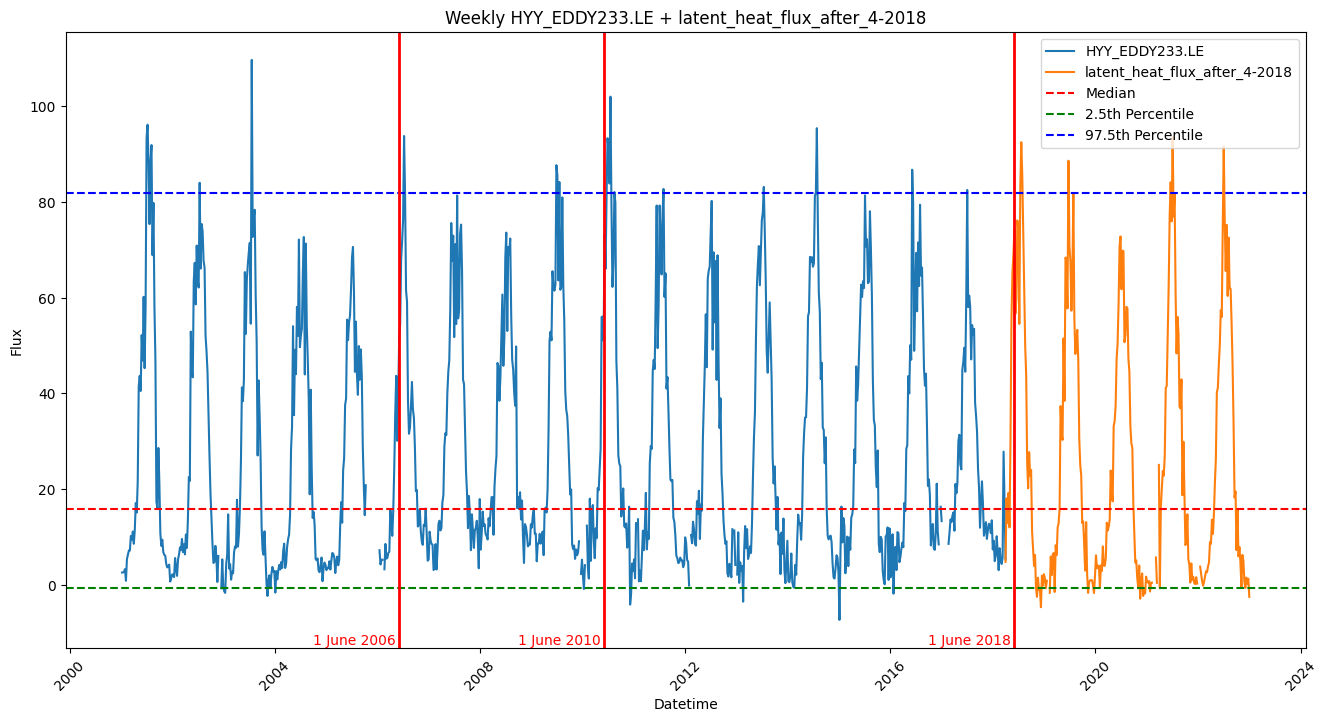

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Calculate combined median and percentiles
combined_series = pd.concat([weekly_df4['HYY_EDDY233.LE'], weekly_df3['latent_heat_flux_after_4-2018']], axis=0)
median = combined_series.median()
q025 = combined_series.quantile(0.025)
q975 = combined_series.quantile(0.975)

# Plot the lines
ax.plot(weekly_df4['Datetime'], weekly_df4['HYY_EDDY233.LE'], label='HYY_EDDY233.LE')
ax.plot(weekly_df3['Datetime'], weekly_df3['latent_heat_flux_after_4-2018'], label='latent_heat_flux_after_4-2018')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Weekly HYY_EDDY233.LE + latent_heat_flux_after_4-2018')
ax.legend()

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-50, 125)

# plt.tight_layout()
plt.show()

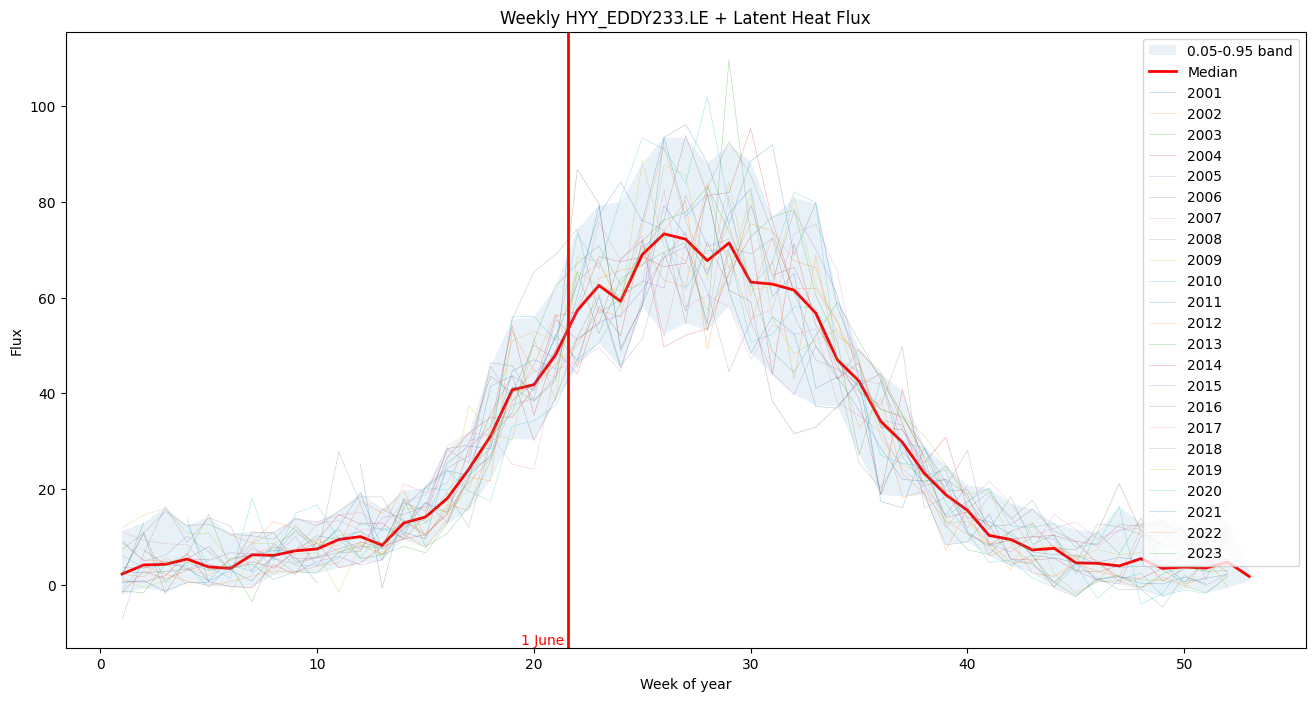

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
weekly_df3_years = weekly_df3.copy()
weekly_df4_years = weekly_df4.copy()

# Rename columns to 'flux'
weekly_df3_years = weekly_df3_years.rename(columns={'latent_heat_flux_after_4-2018': 'flux'})
weekly_df4_years = weekly_df4_years.rename(columns={'HYY_EDDY233.LE': 'flux'})

#Concatenate the dataframes
weekly_df34_years = pd.concat([weekly_df4_years[['Datetime', 'flux']],
                        weekly_df3_years[['Datetime', 'flux']]],
                       ignore_index=True)

# Add a column for the week of year
weekly_df34_years['week'] = weekly_df34_years['Datetime'].dt.isocalendar().week

# Add a column for the year
weekly_df34_years['year'] = weekly_df34_years['Datetime'].dt.year

# Drop the column 'Datetime'
weekly_df34_years = weekly_df34_years.drop(columns='Datetime')

# Aggregate duplicate rows by taking the mean of 'flux'
weekly_df34_years = weekly_df34_years.groupby(['week', 'year']).agg({'flux': 'mean'}).reset_index()

# Pivot the DataFrame so that rows are weeks and columns are years
weekly_df34_years = weekly_df34_years.pivot(index='week', columns='year', values='flux')

fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(weekly_df34_years.index, weekly_df34_years.quantile(0.05, axis=1), weekly_df34_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
weekly_df34_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
weekly_df34_years.plot(ax=ax, alpha=0.4, linewidth=0.4)

# Add labels, title, and legend
ax.set_xlabel('Week of year')
ax.set_ylabel('Flux')
ax.set_title('Weekly HYY_EDDY233.LE + Latent Heat Flux')
ax.legend(['0.05-0.95 band', 'Median'] + weekly_df34_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(21.57, color='r', lw=2)

# Add labels to the lines
ax.text(21.4, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()


## Monthly data

In [ ]:
# monthly_df1 = df1.resample('ME', on = 'Datetime').mean().reset_index()
# monthly_df2 = df2.resample('ME', on = 'Datetime').mean().reset_index()
# monthly_df3 = df3.resample('ME', on = 'Datetime').mean().reset_index()
# monthly_df4 = df4.resample('ME', on = 'Datetime').mean().reset_index()

### GPP NEE flux

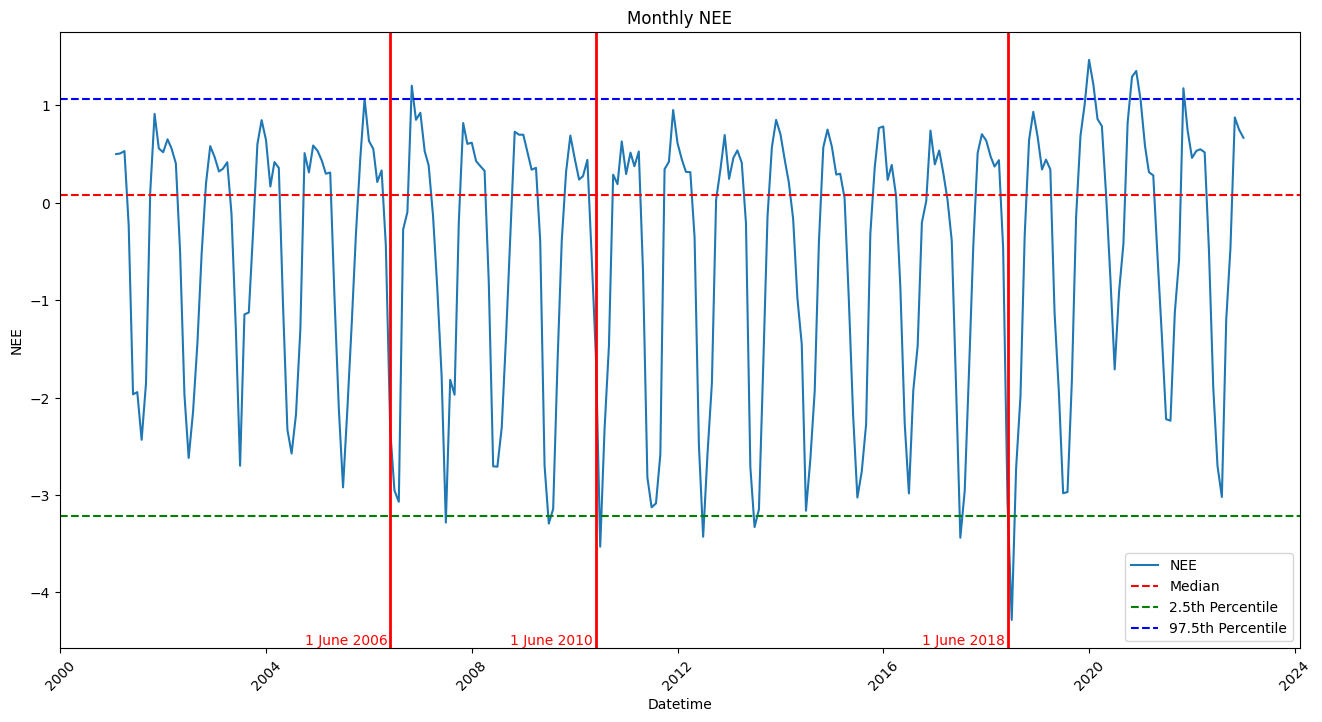

In [ ]:
# Calculate median and the percentiles
median = monthly_df1['NEE'].median()
q025 = monthly_df1['NEE'].quantile(0.025)
q975 = monthly_df1['NEE'].quantile(0.975)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(monthly_df1['Datetime'] , monthly_df1['NEE'], label='NEE')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('NEE')
ax.set_title('Monthly NEE')
ax.legend(loc='lower right')

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()

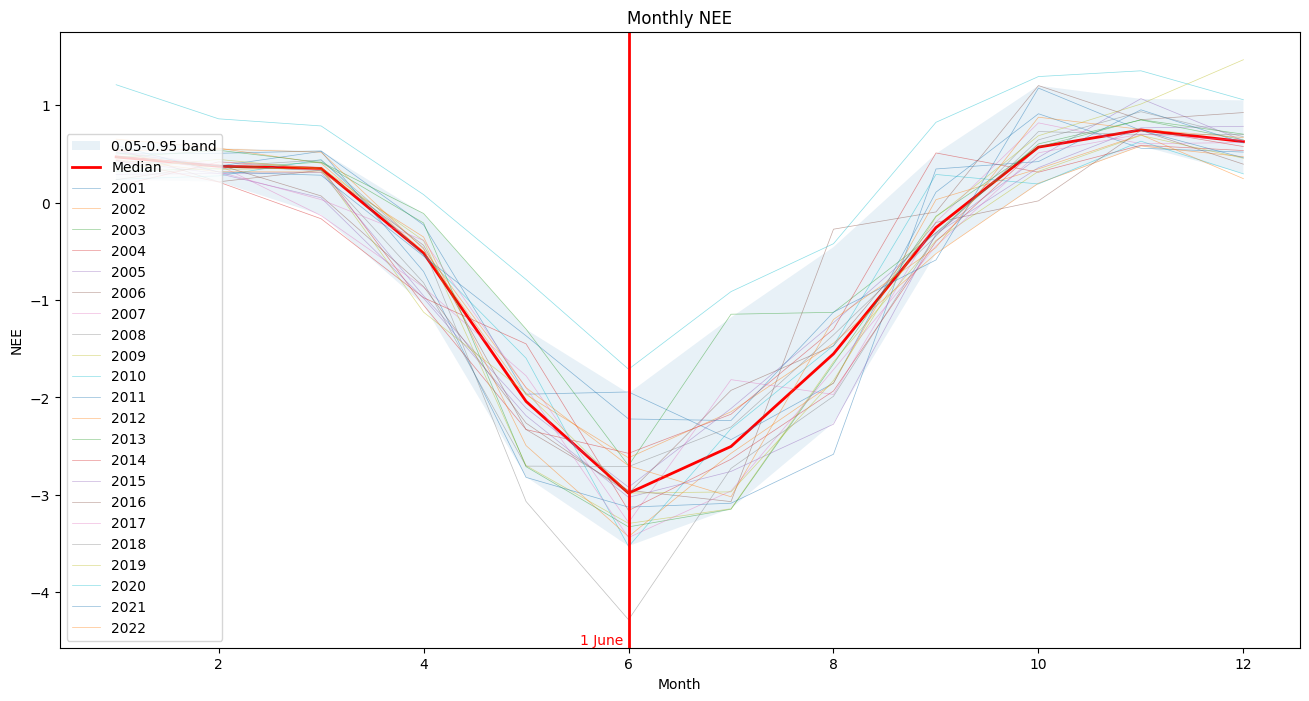

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df1_years = monthly_df1.copy()

# Add a column for the month number
monthly_df1_years['month'] = monthly_df1_years['Datetime'].dt.month

# Add a column for the year
monthly_df1_years['year'] = monthly_df1_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df1_years = monthly_df1_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df1_years = monthly_df1_years.pivot(index='month', columns='year', values='NEE')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df1_years.index, monthly_df1_years.quantile(0.05, axis=1), monthly_df1_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df1_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df1_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('NEE')
ax.set_title('Monthly NEE')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df1_years.columns.tolist(), loc='lower left')

# Highlight the period of interest
ax.axvline(6, color='r', lw=2)

# Add labels to the lines
ax.text(5.95, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()

### VOC

Text(2018-05-10 00:00:00, -29.078945548128342, '1 June 2018')

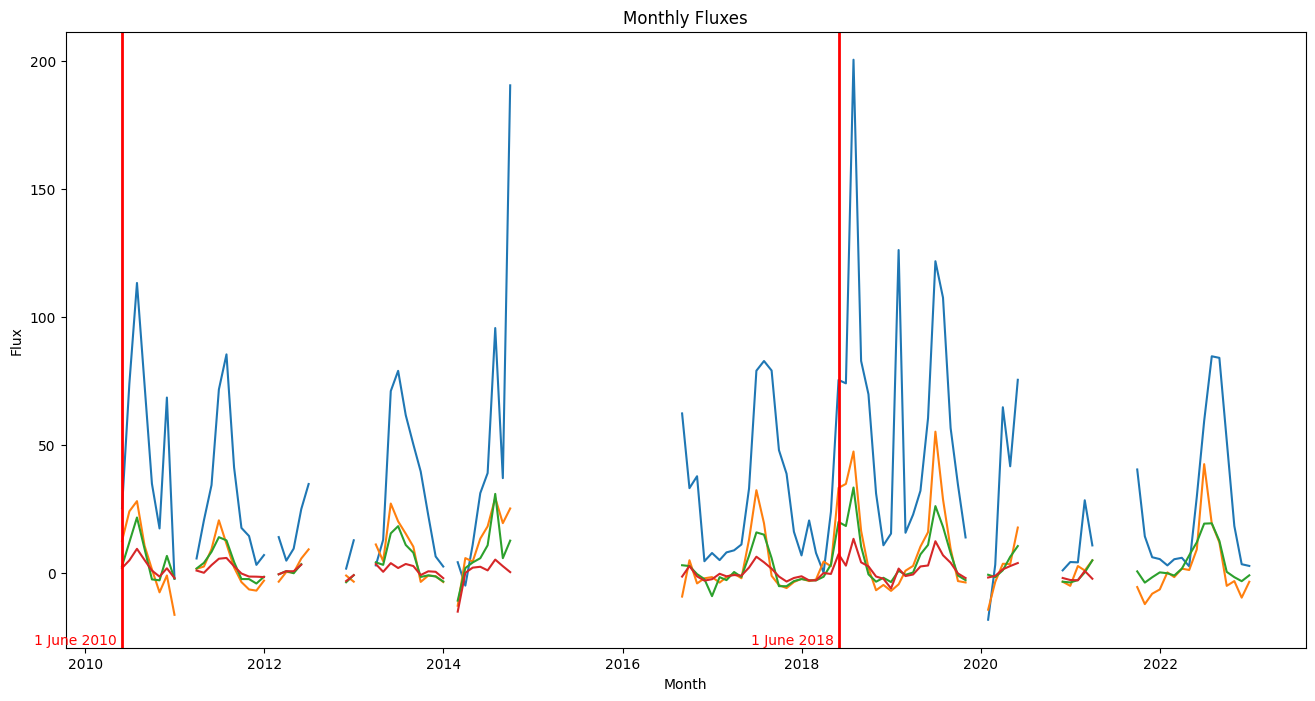

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the lines
ax.plot(monthly_df2['Datetime'], monthly_df2['monoterpene_flux'], label='monoterpene_flux')
ax.plot(monthly_df2['Datetime'], monthly_df2['methanol_flux'], label='methanol_flux')
ax.plot(monthly_df2['Datetime'], monthly_df2['acetone_flux'], label='acetone_flux')
ax.plot(monthly_df2['Datetime'], monthly_df2['acetaldehyde_flux'], label='acetaldehyde_flux')

# Set plot title
ax.set_title('Monthly Fluxes')
ax.set_xlabel('Month')
ax.set_ylabel('Flux')

# Highlight the periods of interest
# ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
# ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')


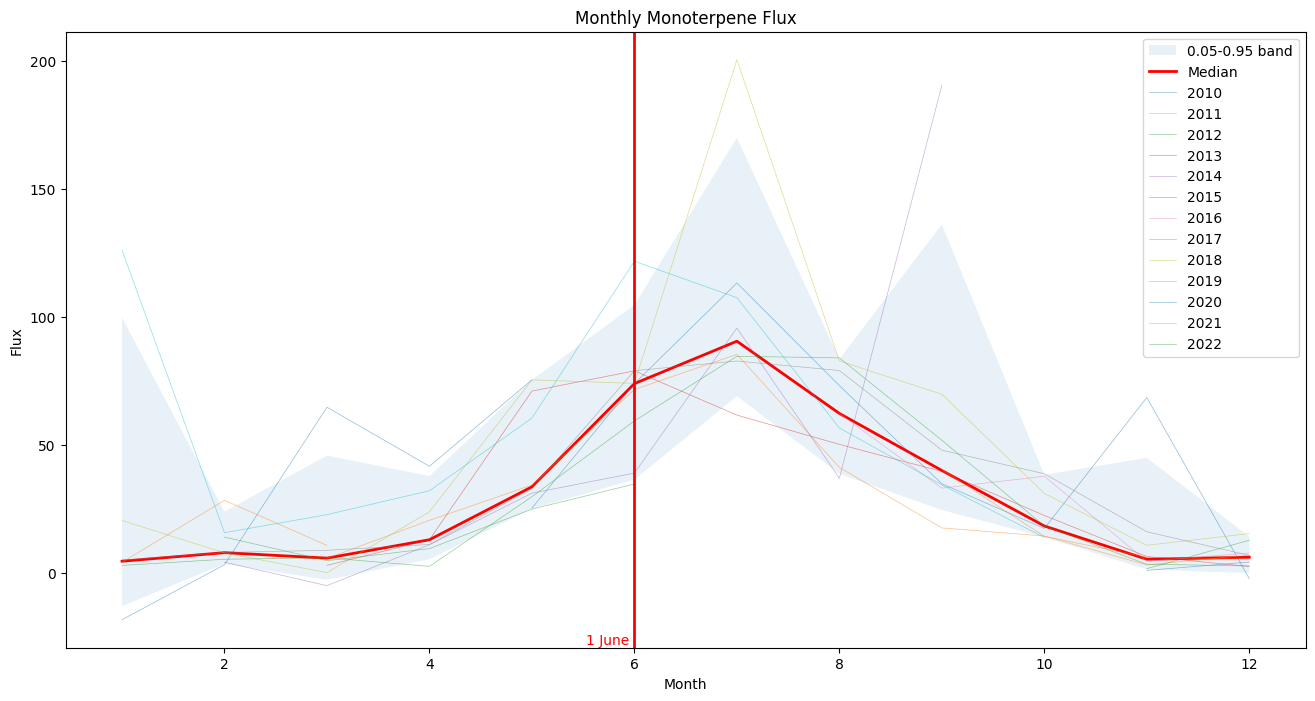

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df2_years = monthly_df2.copy()

# Add a column for the month number
monthly_df2_years['month'] = monthly_df2_years['Datetime'].dt.month

# Add a column for the year
monthly_df2_years['year'] = monthly_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df2_years = monthly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df2_years = monthly_df2_years.pivot(index='month', columns='year', values='monoterpene_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df2_years.index, monthly_df2_years.quantile(0.05, axis=1), monthly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Flux')
ax.set_title('Monthly Monoterpene Flux')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df2_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(6, color='r', lw=2)

# Add labels to the lines
ax.text(5.95, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()

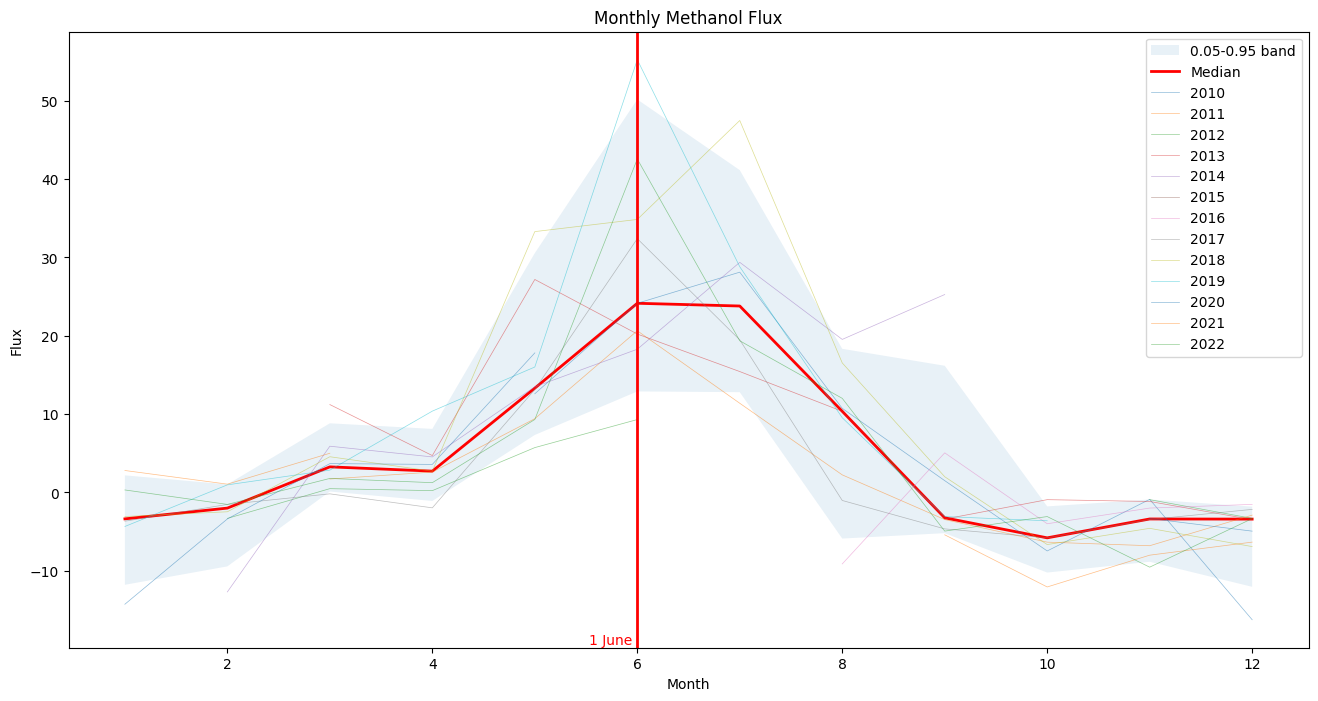

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df2_years = monthly_df2.copy()

# Add a column for the month number
monthly_df2_years['month'] = monthly_df2_years['Datetime'].dt.month

# Add a column for the year
monthly_df2_years['year'] = monthly_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df2_years = monthly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df2_years = monthly_df2_years.pivot(index='month', columns='year', values='methanol_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df2_years.index, monthly_df2_years.quantile(0.05, axis=1), monthly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Flux')
ax.set_title('Monthly Methanol Flux')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df2_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(6, color='r', lw=2)

# Add labels to the lines
ax.text(5.95, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()

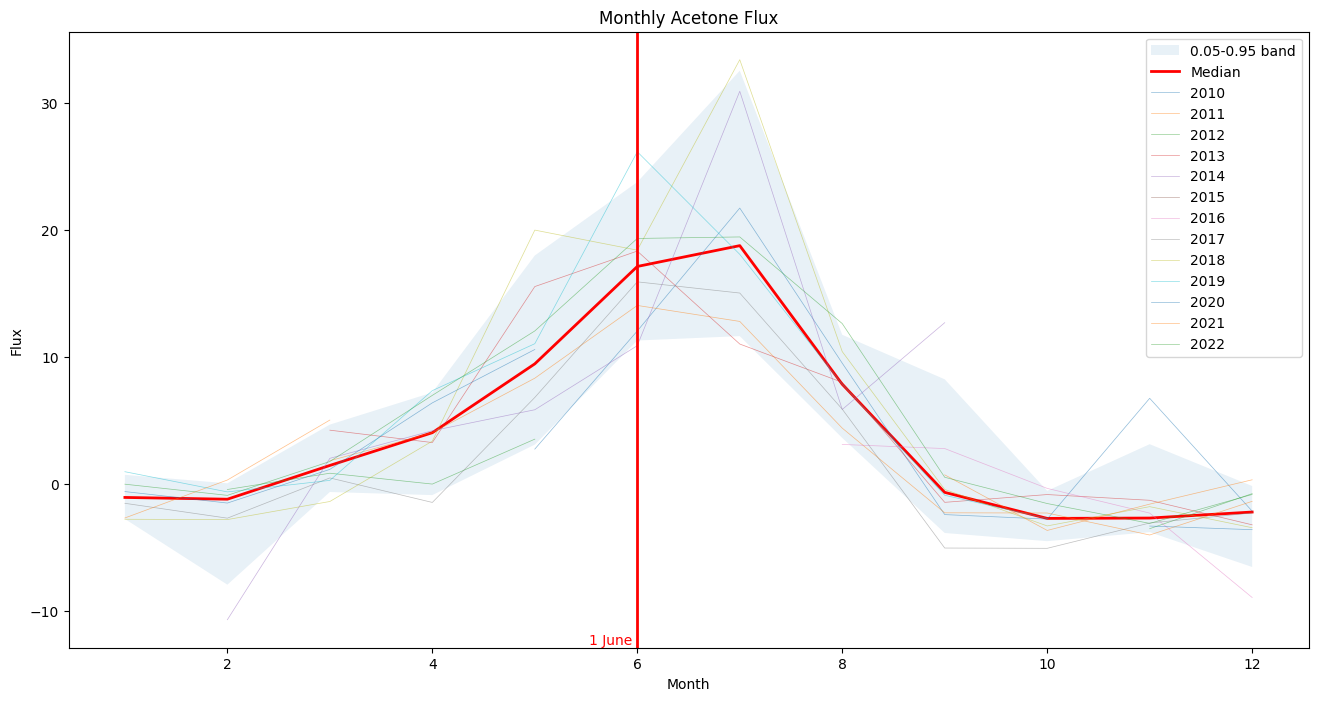

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df2_years = monthly_df2.copy()

# Add a column for the month number
monthly_df2_years['month'] = monthly_df2_years['Datetime'].dt.month

# Add a column for the year
monthly_df2_years['year'] = monthly_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df2_years = monthly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df2_years = monthly_df2_years.pivot(index='month', columns='year', values='acetone_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df2_years.index, monthly_df2_years.quantile(0.05, axis=1), monthly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Flux')
ax.set_title('Monthly Acetone Flux')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df2_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(6, color='r', lw=2)

# Add labels to the lines
ax.text(5.95, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()

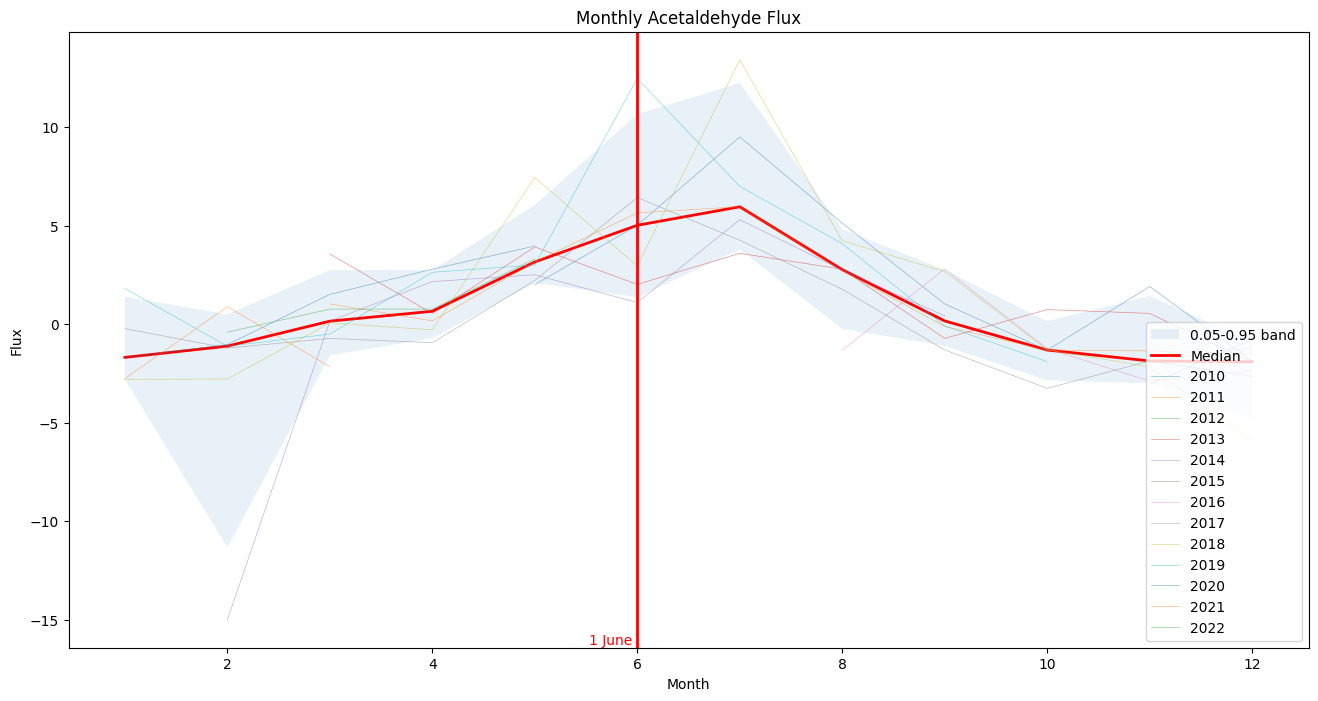

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df2_years = monthly_df2.copy()

# Add a column for the month number
monthly_df2_years['month'] = monthly_df2_years['Datetime'].dt.month

# Add a column for the year
monthly_df2_years['year'] = monthly_df2_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df2_years = monthly_df2_years.drop(columns='Datetime')

# Pivot the DataFrame so that rows are months and columns are years
monthly_df2_years = monthly_df2_years.pivot(index='month', columns='year', values='acetaldehyde_flux')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df2_years.index, monthly_df2_years.quantile(0.05, axis=1), monthly_df2_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df2_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individiual years
monthly_df2_years.plot(ax=ax, alpha=0.5, linewidth=0.5)

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Flux')
ax.set_title('Monthly Acetaldehyde Flux')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df2_years.columns.tolist(), loc='lower right')

# Highlight the period of interest
ax.axvline(6, color='r', lw=2)

# Add labels to the lines
ax.text(5.95, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()

### Latent heat flux

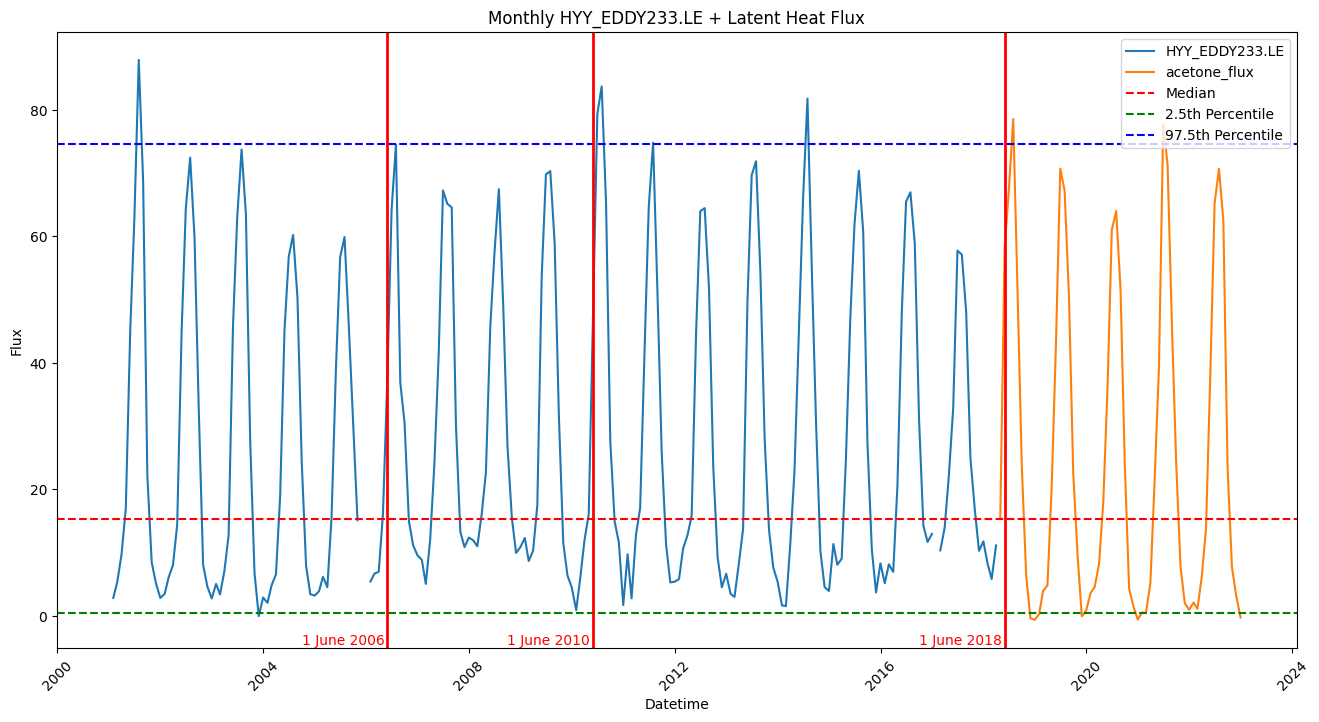

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Calculate combined median and percentiles
combined_series = pd.concat([monthly_df4['HYY_EDDY233.LE'], monthly_df3['latent_heat_flux_after_4-2018']], axis=0)
median = combined_series.median()
q025 = combined_series.quantile(0.025)
q975 = combined_series.quantile(0.975)

# Plot the lines
ax.plot(monthly_df4['Datetime'], monthly_df4['HYY_EDDY233.LE'], label='HYY_EDDY233.LE')
ax.plot(monthly_df3['Datetime'], monthly_df3['latent_heat_flux_after_4-2018'], label='acetone_flux')
ax.axhline(y=median, color='r', linestyle='--', label='Median')
ax.axhline(y=q025, color='g', linestyle='--', label='2.5th Percentile')
ax.axhline(y=q975, color='b', linestyle='--', label='97.5th Percentile')

# Add labels, title, and legend
ax.set_xlabel('Datetime')
ax.set_ylabel('Flux')
ax.set_title('Monthly HYY_EDDY233.LE + Latent Heat Flux')
ax.legend(loc='upper right')

# Grid and rotation for better readability
plt.xticks(rotation=45)

# Highlight the periods of interest
ax.axvline(datetime(2006,6,1), color='r', lw=2)
ax.axvline(datetime(2010,6,1), color='r', lw=2)
ax.axvline(datetime(2018,6,1), color='r', lw=2)

# Add labels to the lines
ax.text(datetime(2006, 5, 10), ax.get_ylim()[0], '1 June 2006', color='r', va='bottom', ha='right')
ax.text(datetime(2010, 5, 10), ax.get_ylim()[0], '1 June 2010', color='r', va='bottom', ha='right')
ax.text(datetime(2018, 5, 10), ax.get_ylim()[0], '1 June 2018', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-50, 125)

# plt.tight_layout()
plt.show()

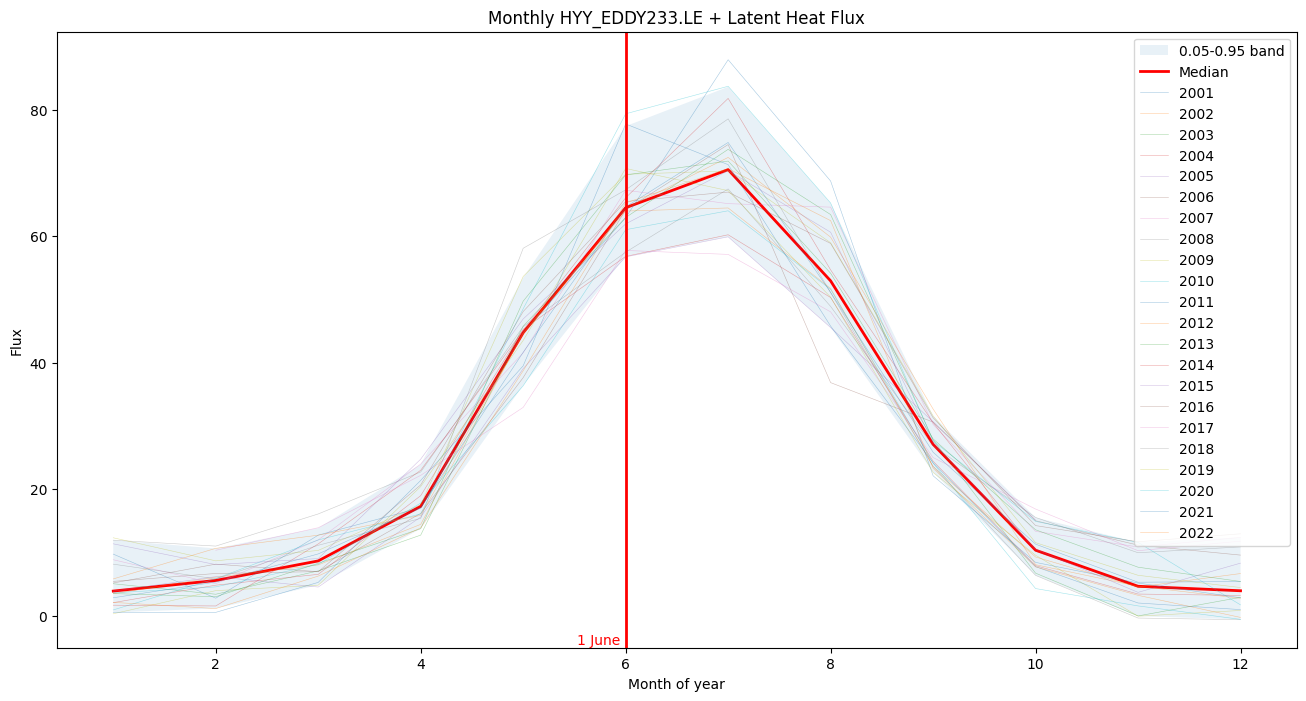

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
monthly_df3_years = monthly_df3.copy()
monthly_df4_years = monthly_df4.copy()

# Rename columns to 'flux'
monthly_df3_years = monthly_df3_years.rename(columns={'latent_heat_flux_after_4-2018': 'flux'})
monthly_df4_years = monthly_df4_years.rename(columns={'HYY_EDDY233.LE': 'flux'})

#Concatenate the dataframes
monthly_df34_years = pd.concat([monthly_df4_years[['Datetime', 'flux']],
                        monthly_df3_years[['Datetime', 'flux']]],
                       ignore_index=True)

# Add a column for the month of year
monthly_df34_years['month'] = monthly_df34_years['Datetime'].dt.month

# Add a column for the year
monthly_df34_years['year'] = monthly_df34_years['Datetime'].dt.year

# Drop the column 'Datetime'
monthly_df34_years = monthly_df34_years.drop(columns='Datetime')

# Aggregate duplicate rows by taking the mean of 'flux'
monthly_df34_years = monthly_df34_years.groupby(['month', 'year']).agg({'flux': 'mean'}).reset_index()

# Pivot the DataFrame so that rows are months and columns are years
monthly_df34_years = monthly_df34_years.pivot(index='month', columns='year', values='flux')

# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the percentile band
ax.fill_between(monthly_df34_years.index, monthly_df34_years.quantile(0.05, axis=1), monthly_df34_years.quantile(0.95, axis=1), alpha=0.1)

# Plot the median
monthly_df34_years.median(axis=1).plot(ax=ax, color='r', linewidth=2)

# Plot the individual years
monthly_df34_years.plot(ax=ax, alpha=0.4, linewidth=0.4)

# Add labels, title, and legend
ax.set_xlabel('Month of year')
ax.set_ylabel('Flux')
ax.set_title('Monthly HYY_EDDY233.LE + Latent Heat Flux')
ax.legend(['0.05-0.95 band', 'Median'] + monthly_df34_years.columns.tolist(), loc='upper right')

# Highlight the period of interest
ax.axvline(6, color='r', lw=2)

# Add labels to the lines
ax.text(5.95, ax.get_ylim()[0], '1 June', color='r', va='bottom', ha='right')

# Set y-axis limits 
# ax.set_ylim(-30, 50)

# plt.tight_layout()
plt.show()
